In [2]:
CODE_REPO_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/analysis/'

import warnings
warnings.filterwarnings('ignore')

from importlib import reload
import sys
import os

import pandas as pd
import scipy as sc
import numpy as np
import astropy.stats.circstats as astropy_circstats

sys.path.insert(0, CODE_REPO_PATH)
import read_data as rd
import analysis_plot as ap
import epg_fc2_im as epg_fc2_im
import behaviour as bh

%config InlineBackend.figure_format = 'retina'

In [3]:
DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/data/'
FIGURE_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/Figures/pdf_and_png/'
SOURCE_DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/source_data/'

save_figure=False
save_source_data=False

### Load EPG & FC2 recodings 

In [4]:
genotypes=epg_fc2_im.load_data(DATA_PATH,reprocess=False)
genotypes=epg_fc2_im.extra_pre_processing(genotypes)

### Correlation between phase and bar position (ED Fig. 1a)

In [5]:
reload(epg_fc2_im)
corr_df, genotype_corr=epg_fc2_im.get_corr_df(genotypes['VT065306-AD-VT029306-DBD'],
                                              genotypes['60D05'],
                                              save=save_source_data,savepath=SOURCE_DATA_PATH,
                                             fname='ED_Fig_1a.csv')

print(genotype_corr)

                   genotype      mean       sem
0                     60D05  0.878339  0.013369
1  VT065306-AD-VT029306-DBD  0.608607  0.045834


genotype
60D05                        9
VT065306-AD-VT029306-DBD    15
dtype: int64


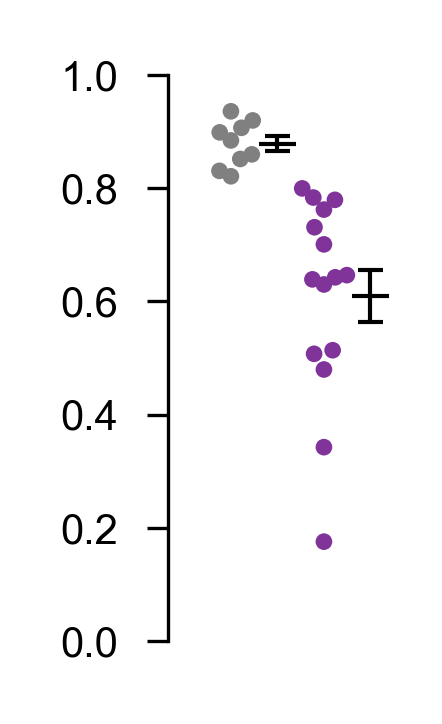

In [6]:
epg_fc2_im.plot_phase_corr(corr_df, genotype_corr,
                           save=save_figure,savepath=FIGURE_PATH,
                          fname='ED_Fig_3a.pdf')

### Cross-correlation between phase velocity and turning velocity (ED Fig. 1b)

In [7]:
reload(epg_fc2_im)
xcorr_df=epg_fc2_im.get_xcorr_df(genotypes)

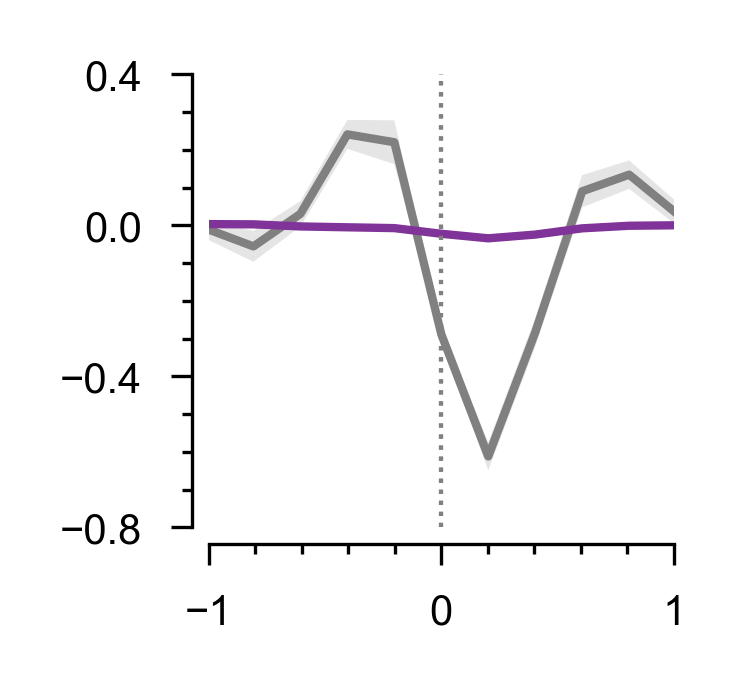

In [8]:
reload(epg_fc2_im)
epg_fc2_im.plot_phase_xcorr(xcorr_df,save=save_figure,savepath=FIGURE_PATH,
                            fname='ED_Fig_3b.pdf'
                           )

### Get menotaxis bouts (called fixation events here)

In [9]:
reload(ap)
fixation_df={}
for genotype,recs in genotypes.items():
    abf_fixation_df,im_fixation_df = ap.get_fixation_events_df(recs,
                                                               detection_parameters={'RDP_epsilon':25,
                                                                                     'min_length':200},
                                                               inplace=True,im=True)
    fixation_df[genotype]=[abf_fixation_df,im_fixation_df]
abf_fixation_df= pd.concat([fixation_df['60D05'][0],fixation_df['VT065306-AD-VT029306-DBD'][0]])

### Example trajectory  (Fig. 1f)

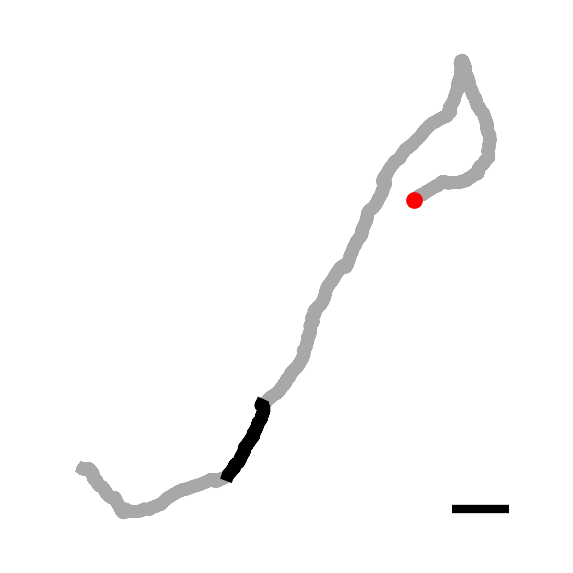

In [10]:
reload(epg_fc2_im)
epg_fc2_im.plot_example_trajectory(genotypes['VT065306-AD-VT029306-DBD'],
                                  rec_name='2022_08_29_0006',
                                  tlim=[1033.838623,1144.630493],
                                   save=save_figure,savepath=FIGURE_PATH,
                                  fname='Fig_1f.png')

### All EPG and FC2 menotaxis bouts (Fig. 1g)

170
17


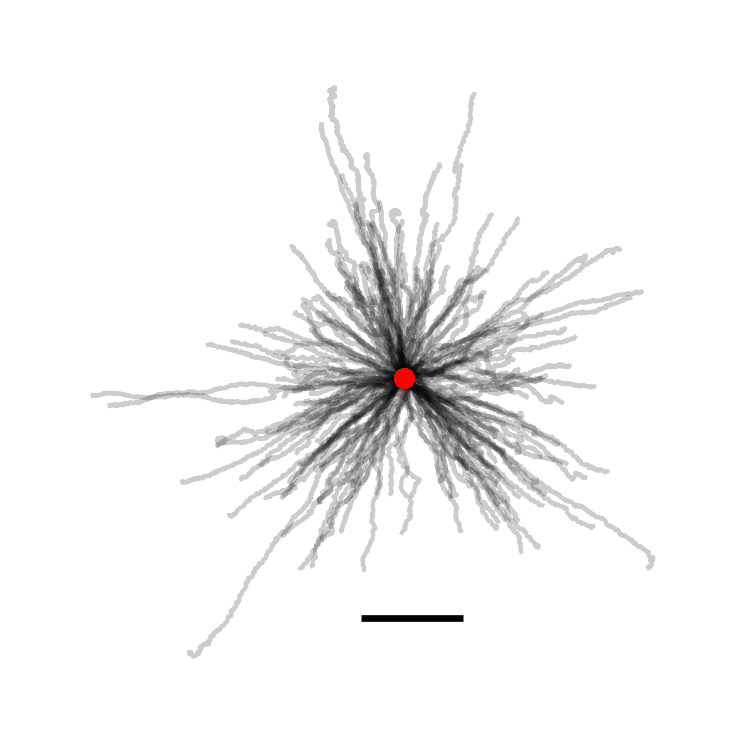

In [11]:
epg_fc2_im.plot_fixation_bouts(abf_fixation_df,save=save_figure,savepath=FIGURE_PATH,fname='Fig_1g.pdf')

### ED Fig. 2e
Same plot but with slightly different x an y lim

genotype
60D05                        7
VT065306-AD-VT029306-DBD    10
dtype: int64
170  bouts


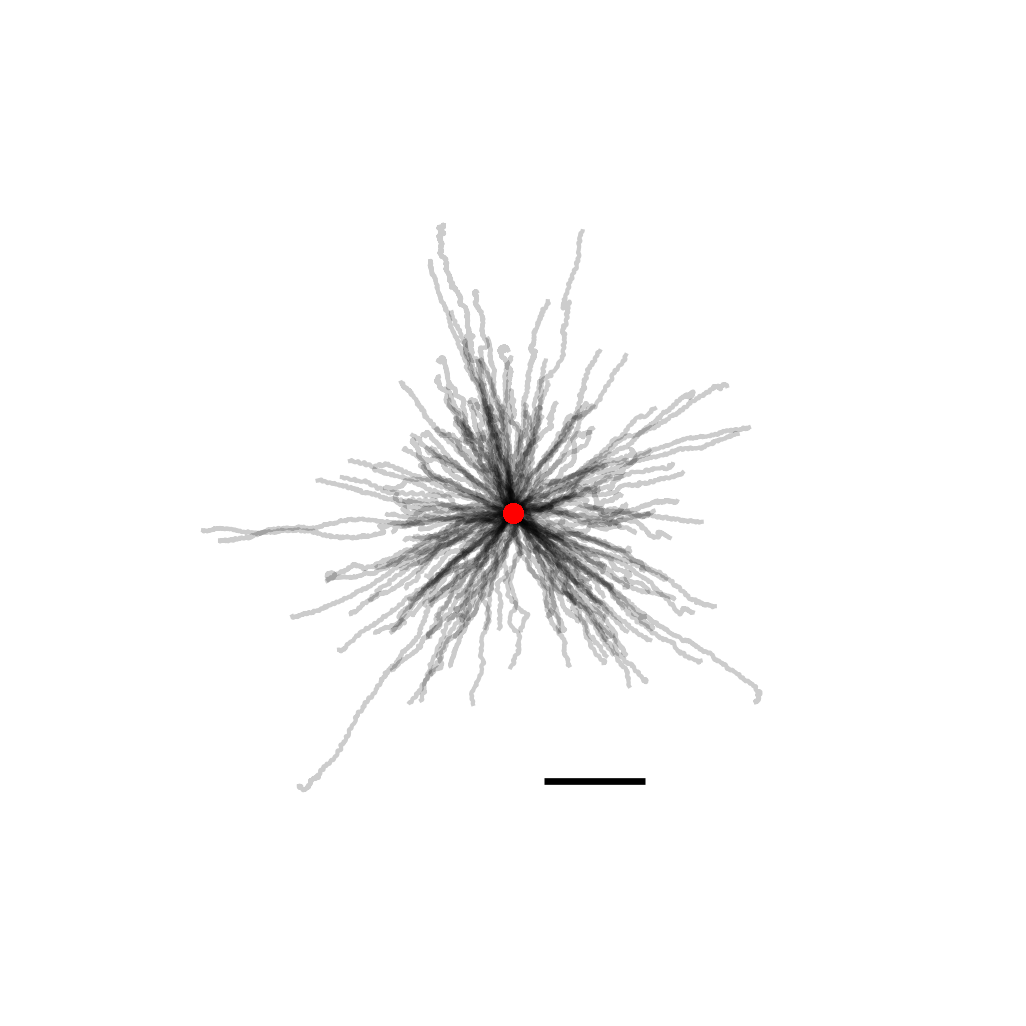

In [12]:
bh.plot_fixation_bouts_ed(abf_fixation_df,
                          save=save_figure,savepath=FIGURE_PATH,fname='ED_Fig_2e_epg_fc2.pdf')

In [13]:
reload(epg_fc2_im)
menotaxis_bouts_raster_df,summary_menotaxis_df=epg_fc2_im.get_menotaxis_bouts_raster_and_goals(genotypes,
                                                                                              save=save_source_data,
                                                                                              savepath=SOURCE_DATA_PATH,
                                                                                              fname='ED_Fig_2f_epg_fc2.csv')

genotype
60D05                       0.312549
VT065306-AD-VT029306-DBD    0.185775
Name: is_fixating, dtype: float64


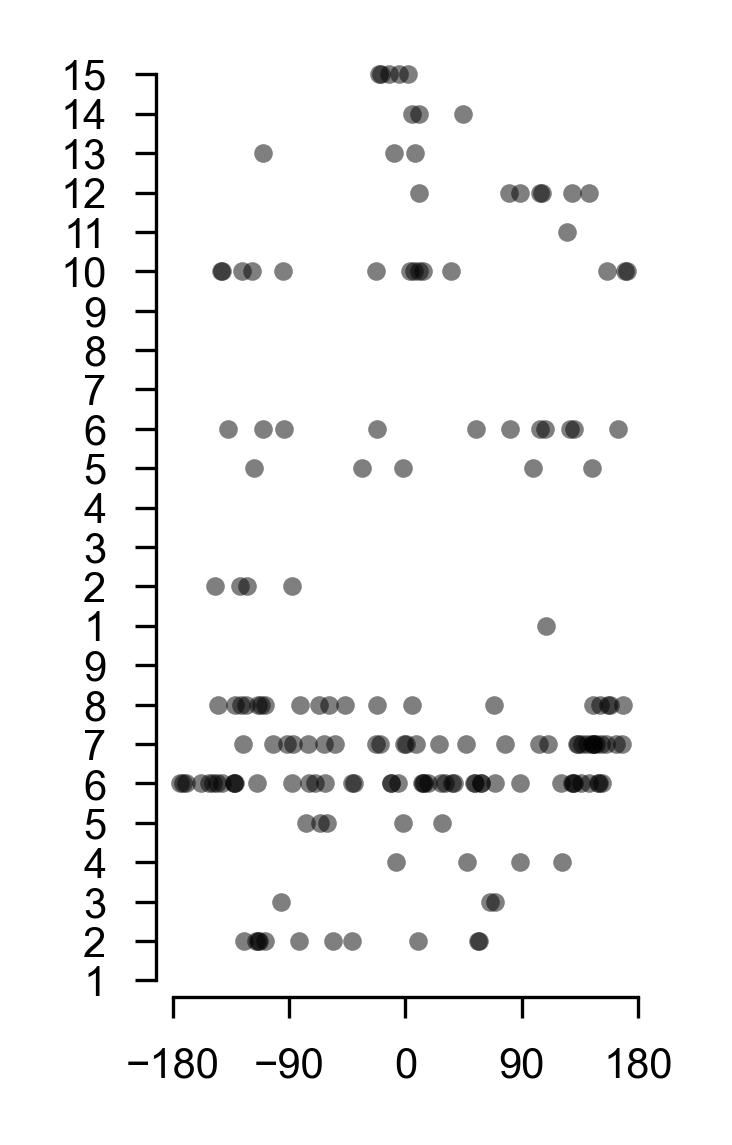

In [14]:
reload(bh)
bh.plot_menotaxis_bout_anlges(summary_menotaxis_df,
                              save=save_figure,
                              savepath=FIGURE_PATH,
                             fname='ED_Fig_2f_epg_fc2.pdf')

### Get bar jump trials

In [15]:
reload(epg_fc2_im)
abf_trials_df, im_trials_df = epg_fc2_im.get_bar_jump_trials(genotypes)

### Zeroed heading and zeroed phase over time for selected trials (Fig. 1m-n)

In [16]:
selected_melted_df,selected_abf_mean_df,selected_im_mean_df = epg_fc2_im.get_selected_trials(abf_trials_df, im_trials_df,
query = '(jump_pos<=135) & (jump_pos >=-135) & (abs_goal_diff<45) & (mean_amplitude_during>0.3) & jump_in_fix==True')

0.07209302325581396% valid trials


9  +90 trials
8  -90 trials


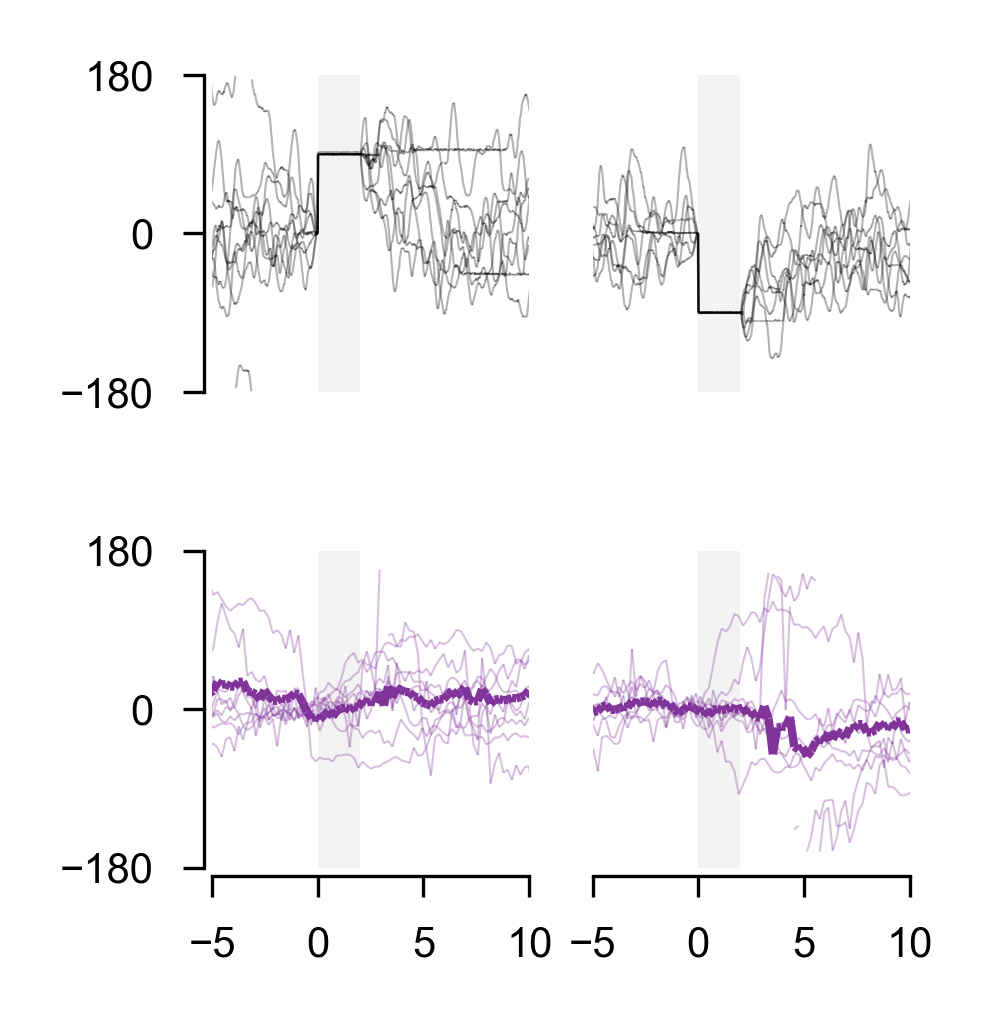

In [17]:
epg_fc2_im.plot_trials_phase_and_xstim_zeroed(genotype='VT065306-AD-VT029306-DBD',
                                              variable_palette={'xstim_zeroed':'k','phase_zeroed':'#803399'},
                                              melted_df=selected_melted_df,im_mean_df=selected_im_mean_df,
                                              save=save_figure,savepath=FIGURE_PATH,fname='Fig_1n.png'
                                             )


6  +90 trials
8  -90 trials


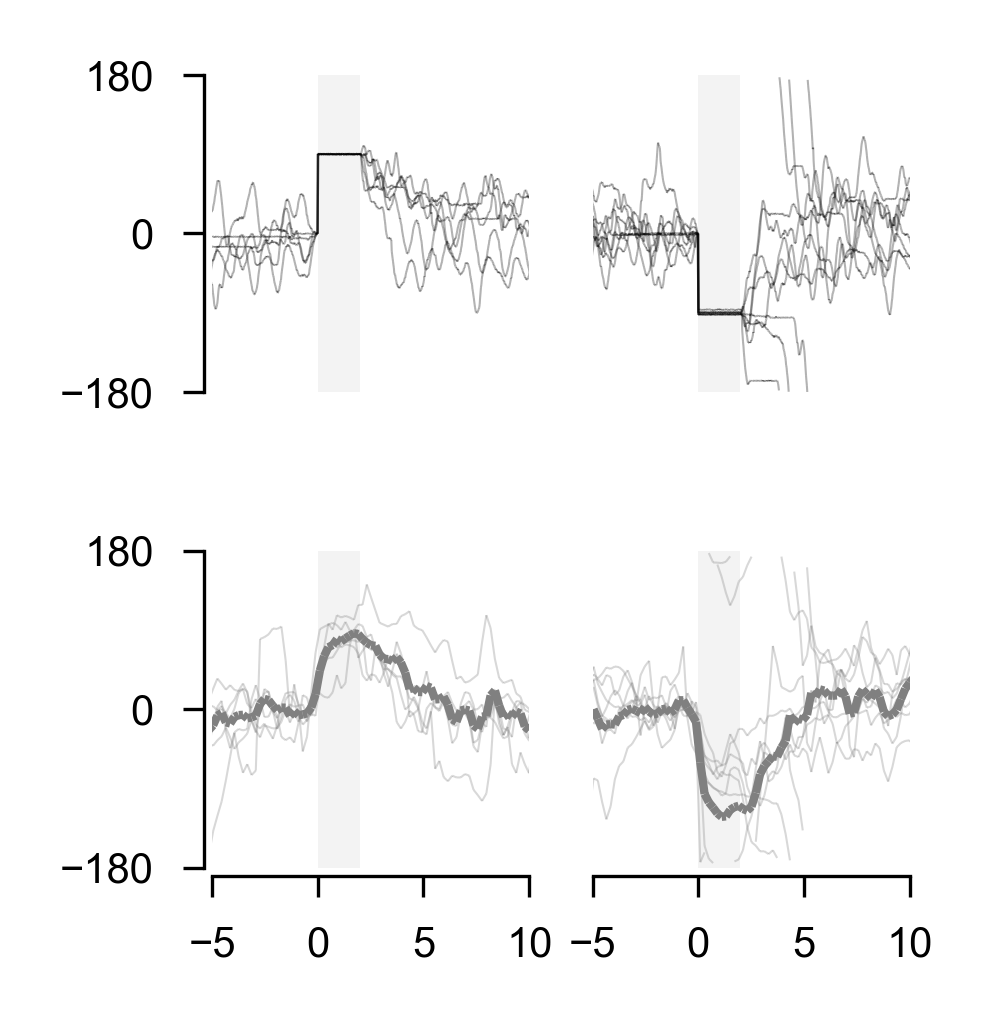

In [18]:
epg_fc2_im.plot_trials_phase_and_xstim_zeroed(genotype='60D05',
                                              variable_palette={'xstim_zeroed':'k','phase_zeroed':'grey'},
                                              melted_df=selected_melted_df,im_mean_df=selected_im_mean_df,
                                              save=save_figure,savepath=FIGURE_PATH,fname='Fig_1m.png'

                                             )

### Change in phase for selected trials (Fig. 1o)

In [19]:
reload(epg_fc2_im)
fly_mean_phase_df,genotype_mean_phase_df = epg_fc2_im.get_mean_bar_jump_phase(selected_melted_df, 
                                                save=save_source_data,savepath=SOURCE_DATA_PATH,
                                                 fname='Fig_1o.csv')

In [20]:
x=np.deg2rad(fly_mean_phase_df.query('genotype=="60D05"')['mean'].values)
print(len(x), 'EPG flies')
print('EPG p value:',astropy_circstats.vtest(x,mu=np.deg2rad(90)))

x=np.deg2rad(fly_mean_phase_df.query('genotype=="VT065306-AD-VT029306-DBD"')['mean'].values)
print(len(x), 'FC2 flies')
print('FC2 p value:',astropy_circstats.vtest(x,mu=0))

5 EPG flies
EPG p value: 0.007989189294453422
7 FC2 flies
FC2 p value: 0.0006653986560082885


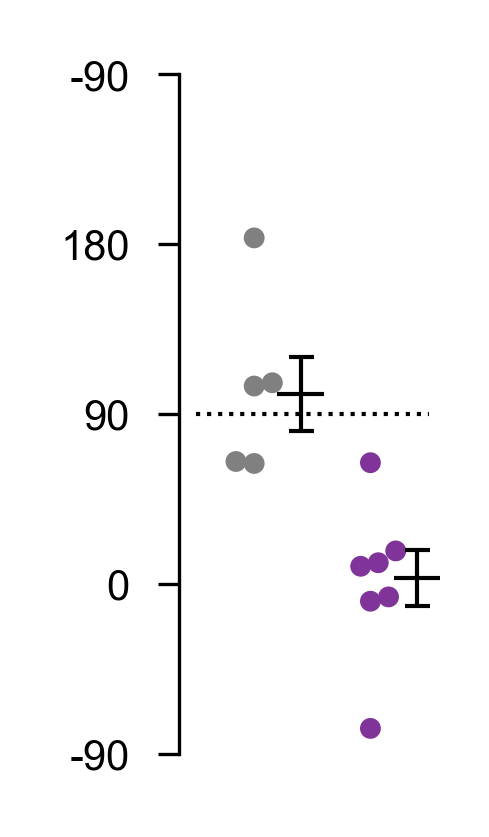

In [24]:
reload(epg_fc2_im)
epg_fc2_im.plot_change_in_phase(fly_mean_phase_df,genotype_mean_phase_df,
                                    save=save_figure,savepath=FIGURE_PATH,fname='Fig_1o.pdf')



### Zeroed heading and zeroed phase over time, but without selecting trials based on behavior  (ED Fig. 3c-d)

In [25]:
no_behaviour_selection_melted_df,\
no_behaviour_selection_abf_mean_df,\
no_behaviour_selection_im_mean_df = epg_fc2_im.get_selected_trials(abf_trials_df, im_trials_df,
                              query = '(jump_pos<=135) & (jump_pos >=-135) & (mean_amplitude_during>0.3) ')

0.5883720930232558% valid trials


72  +90 trials
68  -90 trials


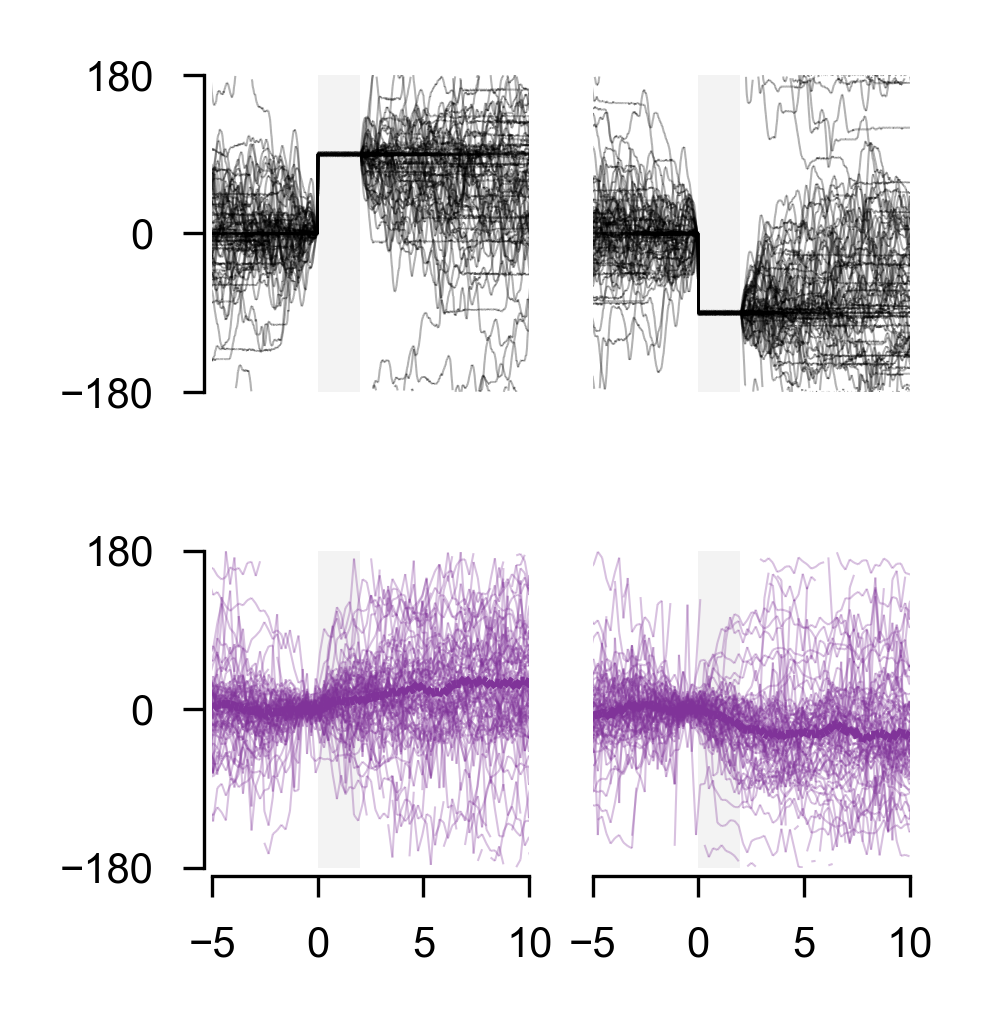

In [26]:
epg_fc2_im.plot_trials_phase_and_xstim_zeroed(genotype='VT065306-AD-VT029306-DBD',
                                              variable_palette={'xstim_zeroed':'k','phase_zeroed':'#803399'},
                                              melted_df=no_behaviour_selection_melted_df,
                                              im_mean_df=no_behaviour_selection_im_mean_df,
                                              save=save_figure,savepath=FIGURE_PATH,
                                              fname='ED_Fig_3d.png'
                                             )


55  +90 trials
58  -90 trials


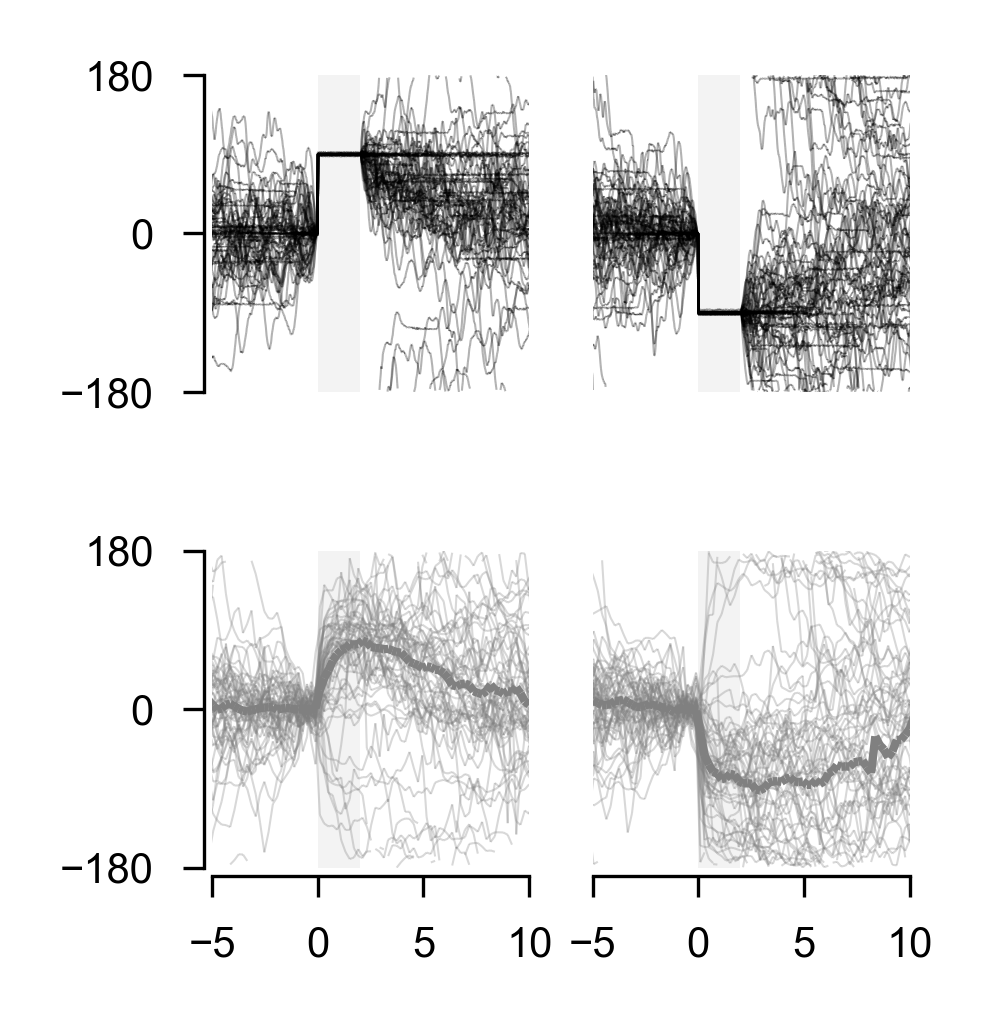

In [27]:
epg_fc2_im.plot_trials_phase_and_xstim_zeroed(genotype='60D05',
                                              variable_palette={'xstim_zeroed':'k','phase_zeroed':'grey'},
                                              melted_df=no_behaviour_selection_melted_df,
                                              im_mean_df=no_behaviour_selection_im_mean_df,
                                               save=save_figure,savepath=FIGURE_PATH,
                                              fname='ED_Fig_3c.png'

                                             )

### Change in phase but without selecting trials based on behavior 

In [28]:
no_behaviour_selection_fly_mean_phase_df,\
no_behaviour_selection_genotype_mean_phase_df = epg_fc2_im.get_mean_bar_jump_phase(no_behaviour_selection_melted_df,
                                                 save=save_source_data,savepath=SOURCE_DATA_PATH,
                                                 fname='ED_Fig_3e.csv')

In [29]:
x=np.deg2rad(no_behaviour_selection_fly_mean_phase_df.query('genotype=="60D05"')['mean'].values)
print(len(x), 'EPG flies')
print('EPG p value:',astropy_circstats.vtest(x,mu=np.deg2rad(90)))

x=np.deg2rad(no_behaviour_selection_fly_mean_phase_df.query('genotype=="VT065306-AD-VT029306-DBD"')['mean'].values)
print(len(x), 'FC2 flies')
print('FC2 p value:',astropy_circstats.vtest(x,mu=0))

9 EPG flies
EPG p value: 2.4885850715037386e-05
15 FC2 flies
FC2 p value: 7.689070513925382e-08


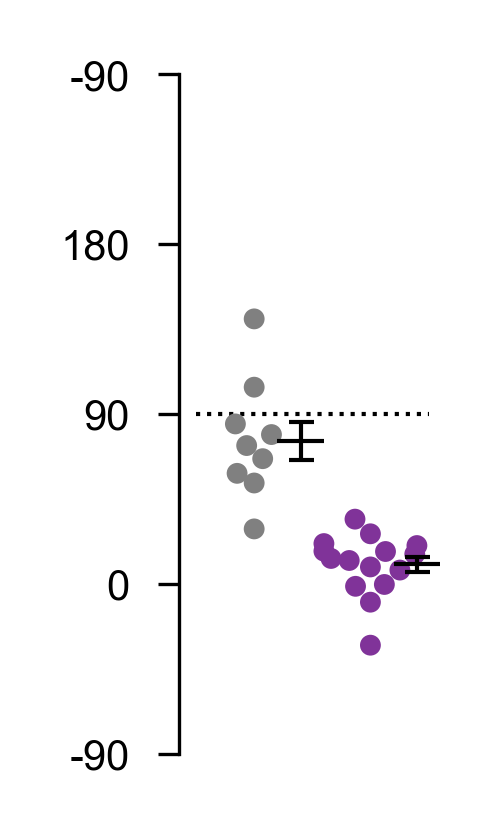

In [30]:
reload(epg_fc2_im)
epg_fc2_im.plot_change_in_phase(no_behaviour_selection_fly_mean_phase_df,
                                    no_behaviour_selection_genotype_mean_phase_df,
                                    save=save_figure,savepath=FIGURE_PATH,fname='ED_Fig_3e.pdf')



### Example time frame (ED Fig. 3j )

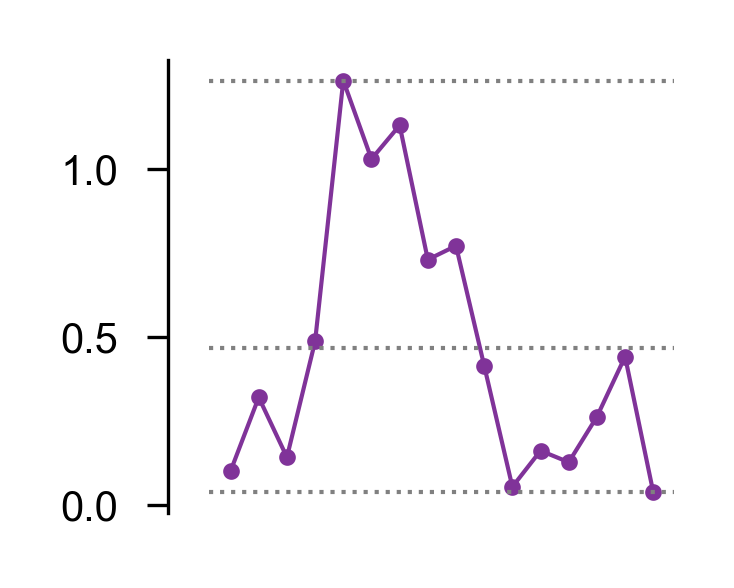

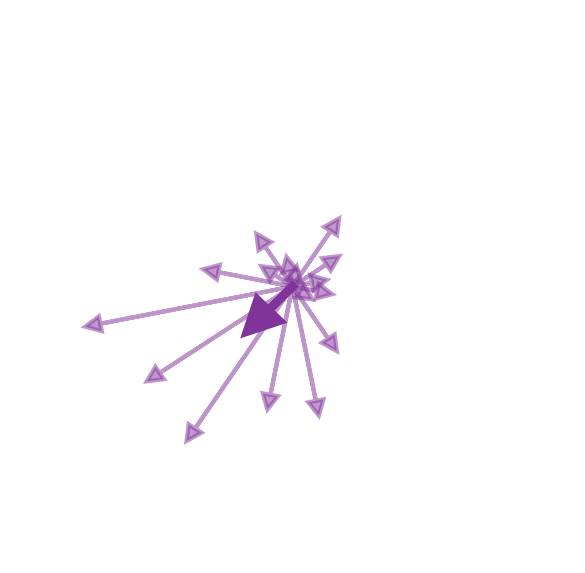

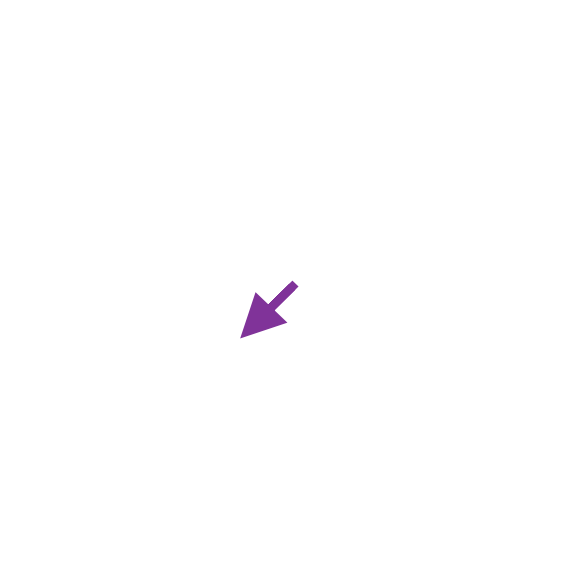

In [31]:
reload(epg_fc2_im)
epg_fc2_im.plot_fc2_timeframe(genotypes['VT065306-AD-VT029306-DBD'],save=save_figure,
                              savepath=FIGURE_PATH,fnames=['ED_Fig_3j','ED_Fig_3k'])

### Change in bump amplitude during bar jumps (ED Fig. 3l-n)

In [32]:
reload(epg_fc2_im)
fly_mean_diff_dF,genotype_mean_diff_dF = epg_fc2_im.get_mean_bar_jump_amplitude_diff(selected_melted_df,'mean_dF/F',
                                                                                    save=save_source_data,
                                                                                     savepath=SOURCE_DATA_PATH,
                                                                                    fname='ED_Fig_3l.csv')

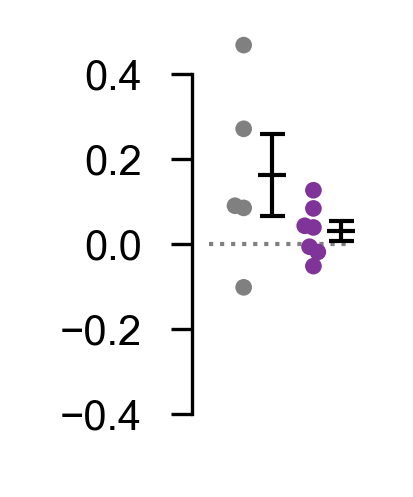

In [33]:
reload(epg_fc2_im)
epg_fc2_im.plot_change_in_amplitude(fly_mean_diff_dF,genotype_mean_diff_dF,ylim=[-0.4,0.4],
                                    save=save_figure,savepath=FIGURE_PATH,
                                    fname='ED_Fig_3l.pdf')

In [34]:
reload(epg_fc2_im)
fly_mean_diff_max_min,genotype_mean_diff_max_min = epg_fc2_im.get_mean_bar_jump_amplitude_diff(selected_melted_df,'max_min', 
                                                                                    save=save_source_data,
                                                                                     savepath=SOURCE_DATA_PATH,
                                                                                    fname='ED_Fig_3m.csv')

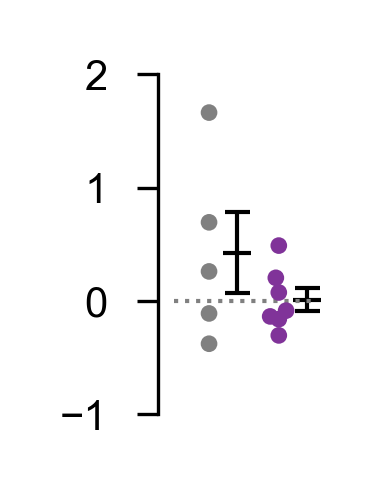

In [35]:
reload(epg_fc2_im)
epg_fc2_im.plot_change_in_amplitude(fly_mean_diff_max_min,genotype_mean_diff_max_min,ylim=[-1,2],
                                    save=save_figure,savepath=FIGURE_PATH,
                                    fname='ED_Fig_3m.pdf')



In [36]:
reload(epg_fc2_im)
fly_mean_diff_pva,genotype_mean_diff_pva = epg_fc2_im.get_mean_bar_jump_amplitude_diff(selected_melted_df,'pva_amplitude', save=save_source_data,
                                                                                     savepath=SOURCE_DATA_PATH,
                                                                                    fname='ED_Fig_3n.csv')

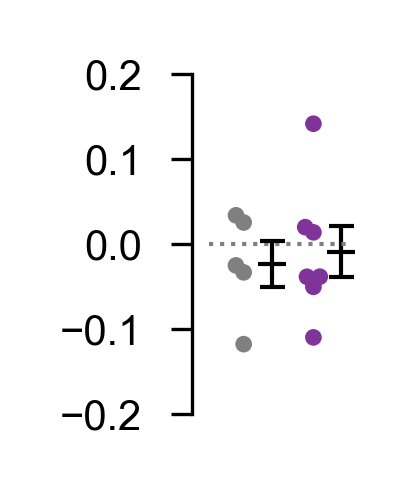

In [37]:
reload(epg_fc2_im)
epg_fc2_im.plot_change_in_amplitude(fly_mean_diff_pva,genotype_mean_diff_pva,ylim=[-0.2,0.2],
                                     save=save_figure,savepath=FIGURE_PATH,
                                    fname='ED_Fig_3n.pdf')



### FC2 activity vs. locomotion (ED Fig. 3q)

In [38]:
reload(epg_fc2_im)
binned_amplitudes_locomotion_dfs=epg_fc2_im.get_binned_amplitudes(genotypes,
                                                       save=save_source_data,
                                                      savepath=SOURCE_DATA_PATH,
                                                      fname='ED_Fig_3q.csv')

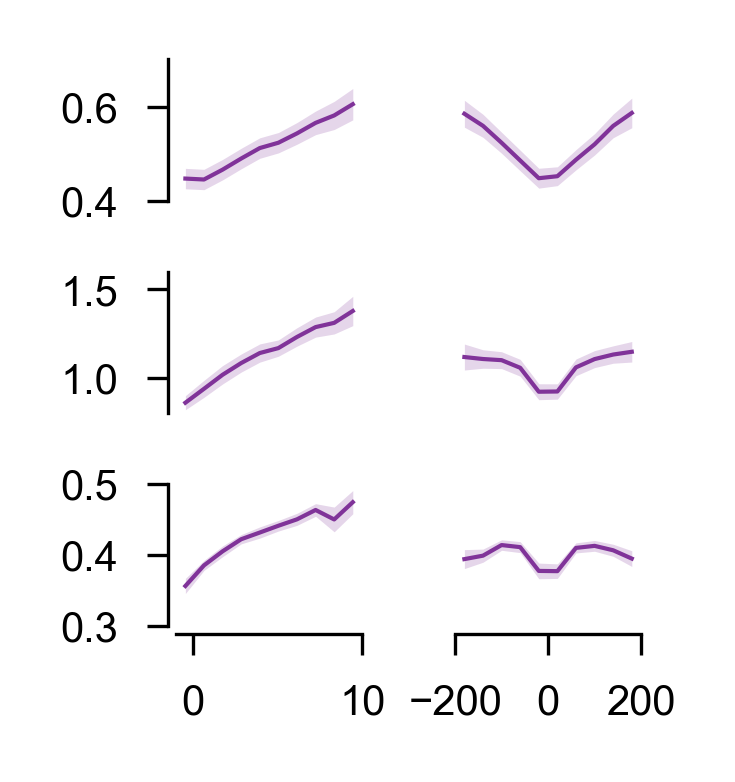

In [41]:
reload(epg_fc2_im)
epg_fc2_im.plot_amplitudes_vs_walking(binned_amplitudes_locomotion_dfs,'VT065306-AD-VT029306-DBD',
                                      save=save_figure,savepath=FIGURE_PATH,fname='ED_Fig_3q.pdf')

### Example trajectory with mean heading vector magnitude

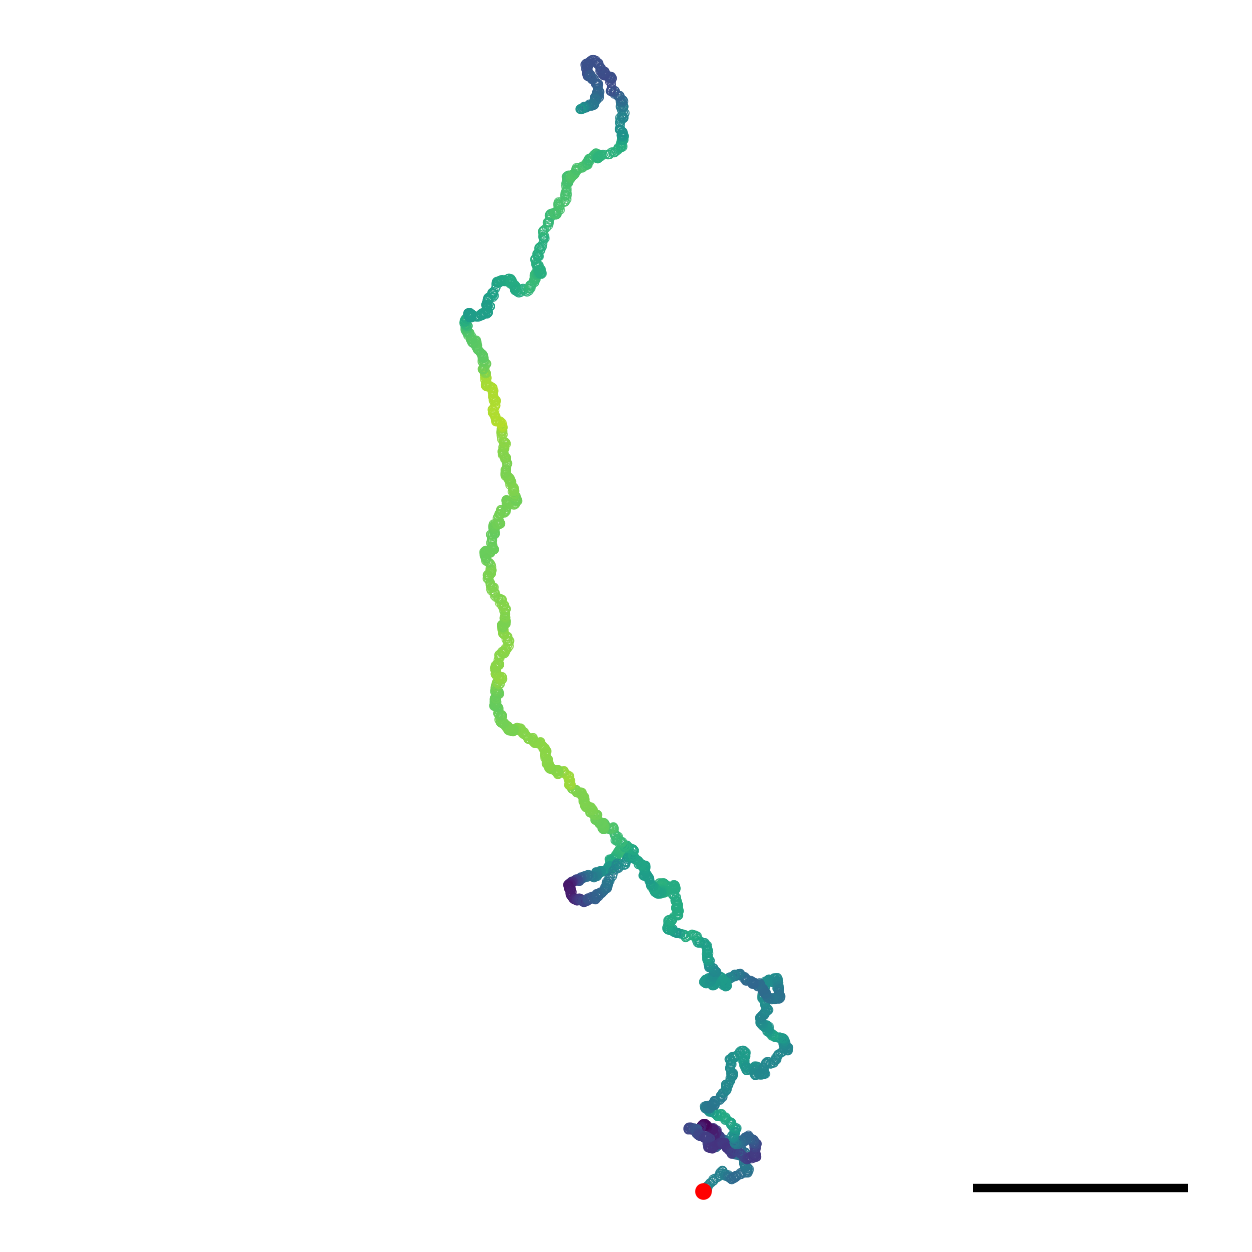

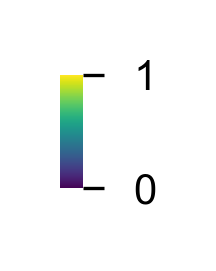

In [51]:
reload(epg_fc2_im)
epg_fc2_im.plot_example_trajectory_r(genotypes['VT065306-AD-VT029306-DBD'].merged_im_df,
                                    rec_name="2022_08_30_0005",label='r_60',
                                     save=save_figure,savepath=FIGURE_PATH,fname='ED_Fig_3o')

### FC2 activity vs. menotaxis bout straightness (ED Fig. 3p)

In [52]:
reload(epg_fc2_im)
binned_amplitudes_r_dfs=epg_fc2_im.get_binned_amplitudes_r(genotypes,
                                                           save=save_source_data,
                                                           savepath=SOURCE_DATA_PATH,
                                                           fname='ED_Fig_3p.csv')

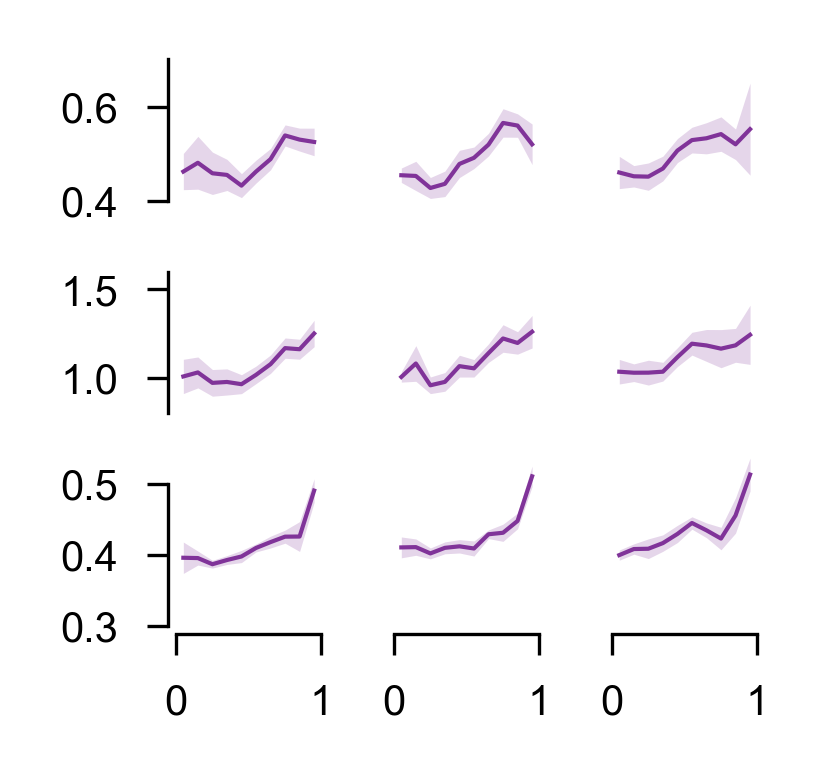

In [53]:
reload(epg_fc2_im)
epg_fc2_im.plot_amplitude_vs_r(binned_amplitudes_r_dfs,'VT065306-AD-VT029306-DBD',
                               save=save_figure,savepath=FIGURE_PATH,fname='ED_Fig_3p.pdf')

### Example traces Fig. 1h,i,k,l and ED Fig. 3h-i

In [54]:
# Need to re-do this since get_trials converts this to None instead of NaN
genotypes['60D05'].merged_im_df['pb_c1_roi_18_dF/F']=np.nan
genotypes['60D05'].merged_im_df['pb_c1_roi_1_dF/F']=np.nan

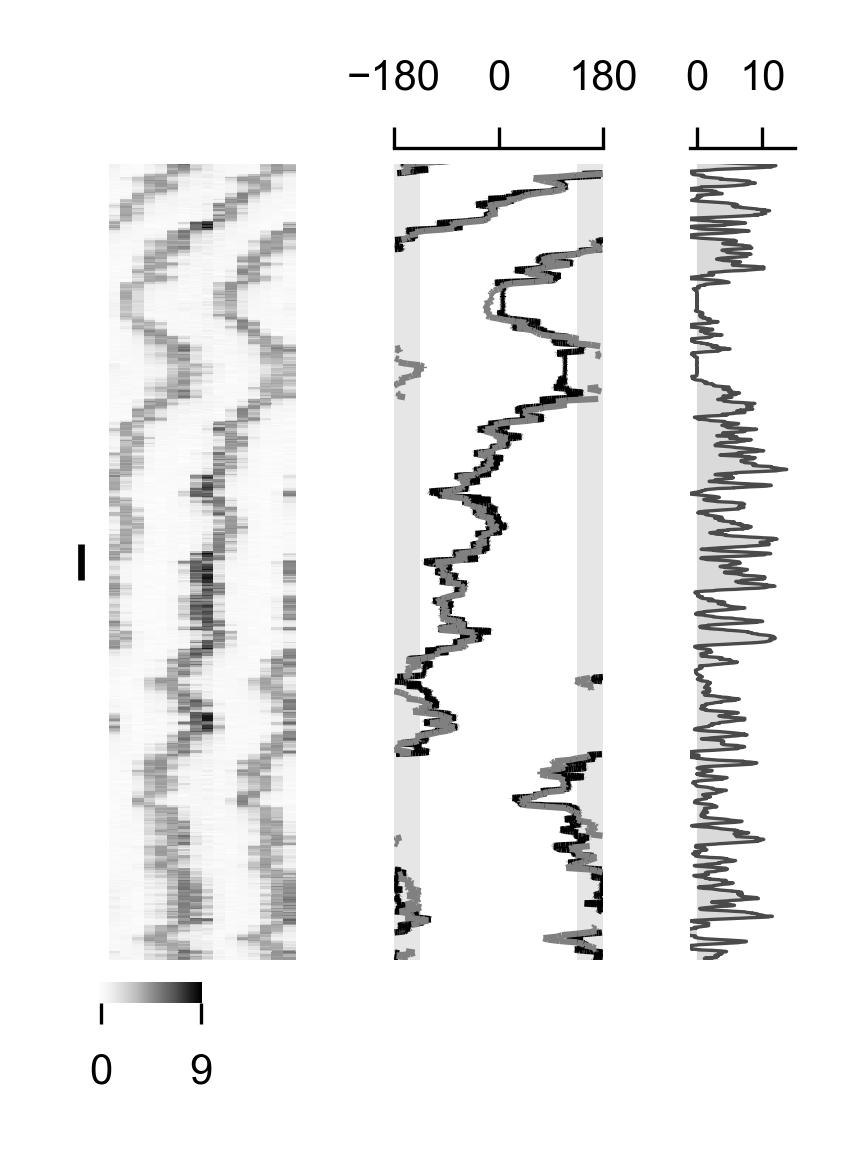

In [55]:
reload(epg_fc2_im)
reload(ap)
epg_fc2_im.plot_example_epg_with_forw(genotypes['60D05'],rec_name='2022_09_01_0007',dforw_lim=[-1,15],tlim=[430,540],return_axes=False,
                            save=save_figure,savepath=FIGURE_PATH,fname='Fig_1h_top.pdf')

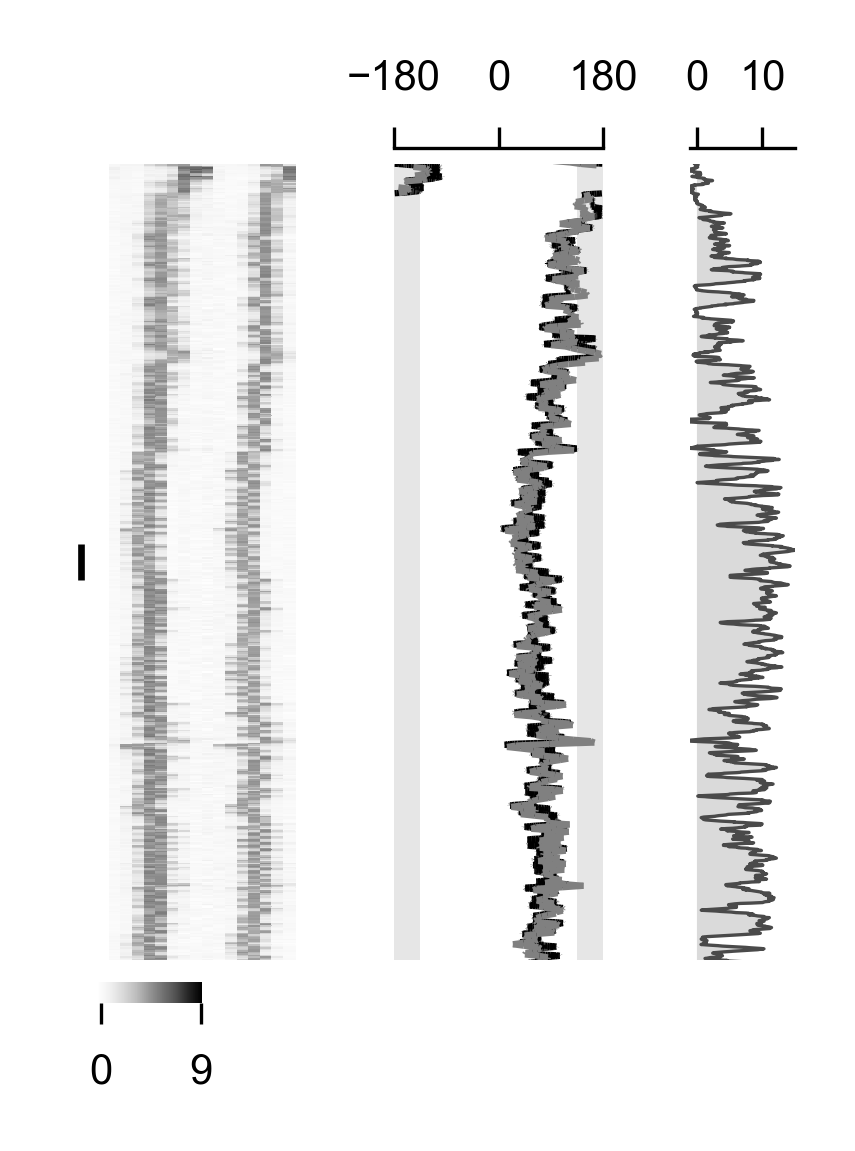

In [56]:
epg_fc2_im.plot_example_epg_with_forw(genotypes['60D05'],rec_name='2022_09_01_0007',dforw_lim=[-1,15],tlim=[1160,1270],
                           save=save_figure,savepath=FIGURE_PATH,fname='Fig_1h_bottom.pdf')

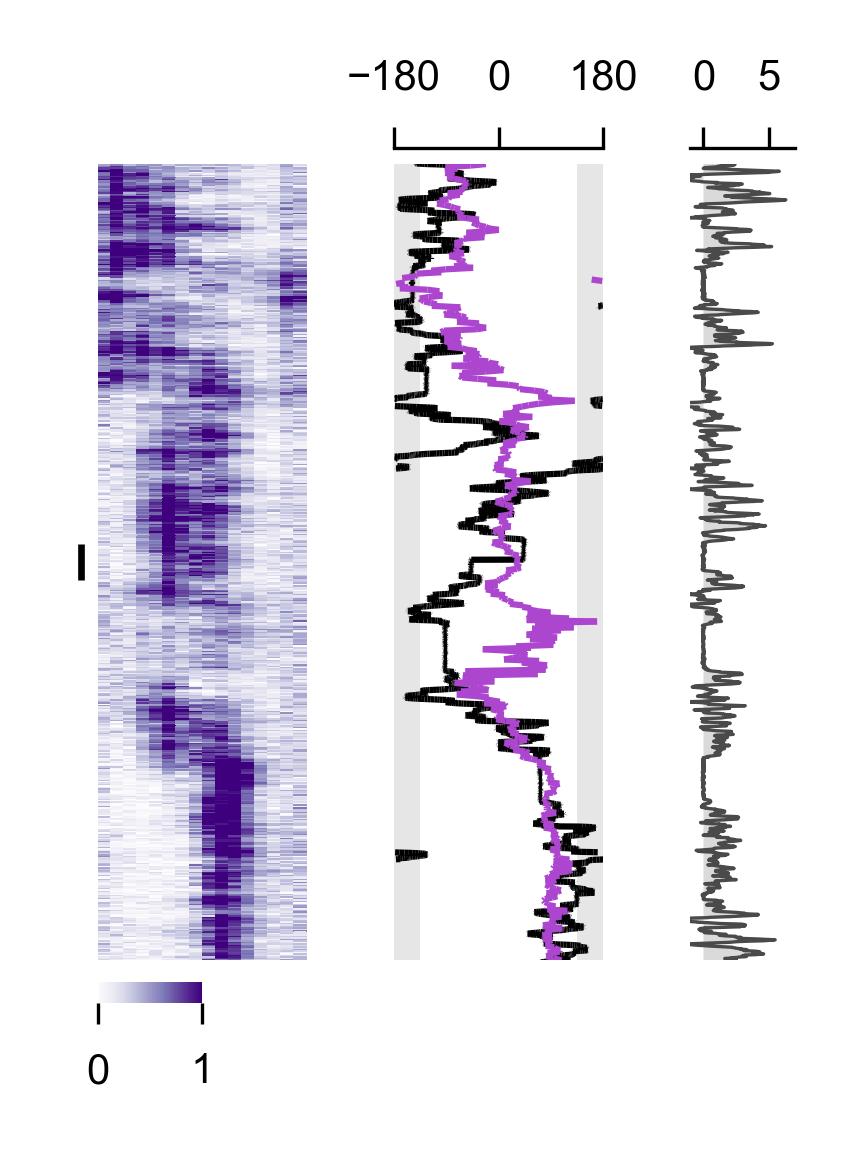

In [57]:
reload(epg_fc2_im)
epg_fc2_im.plot_example_fc2_with_forw(genotypes['VT065306-AD-VT029306-DBD'],rec_name='2022_08_30_0007',tlim=[613,613+110],
                                      dforw_lim=[-1,7],
                           save=save_figure,savepath=FIGURE_PATH,fname='Fig_1i_top.pdf')

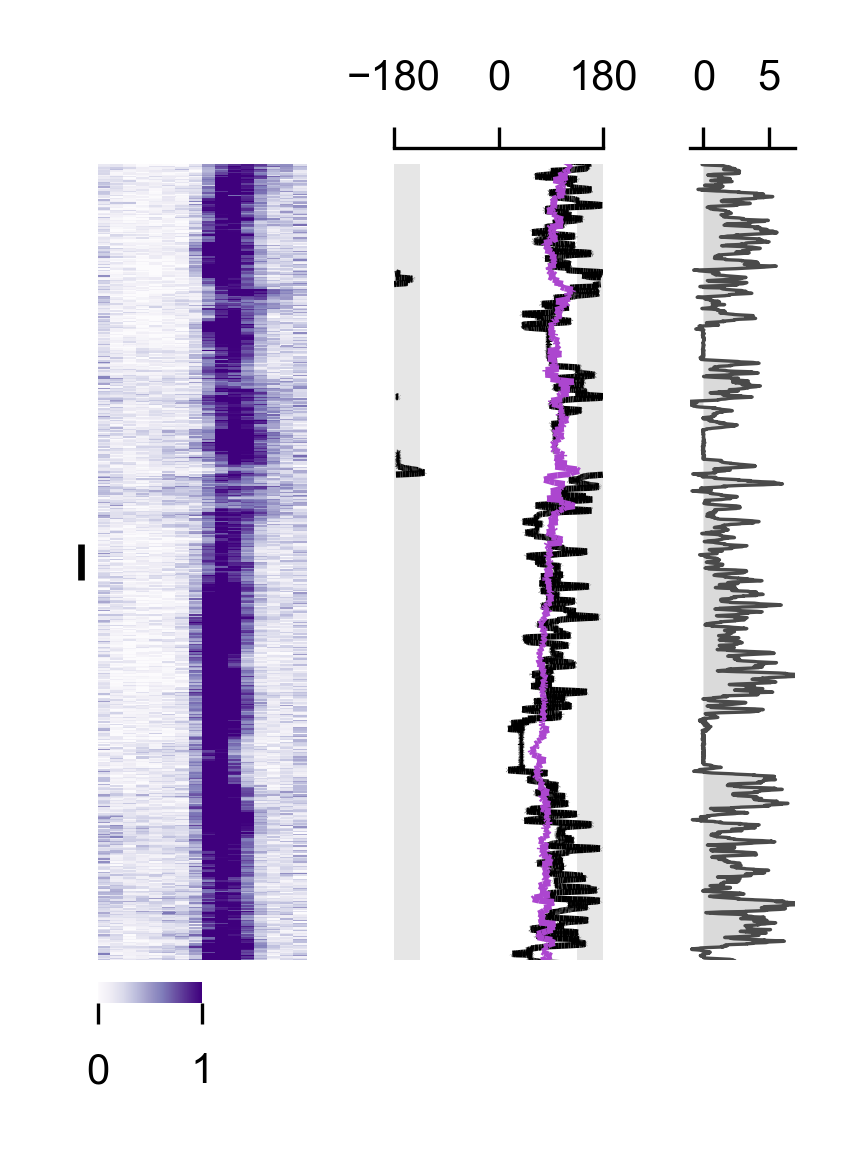

In [58]:
epg_fc2_im.plot_example_fc2_with_forw(genotypes['VT065306-AD-VT029306-DBD'],rec_name='2022_08_30_0007',
                                      dforw_lim=[-1,7],
                                      tlim=[750,750+110],return_axes=False,
                           save=save_figure,savepath=FIGURE_PATH,fname='Fig_1i_bottom.pdf')

Example bar jumps

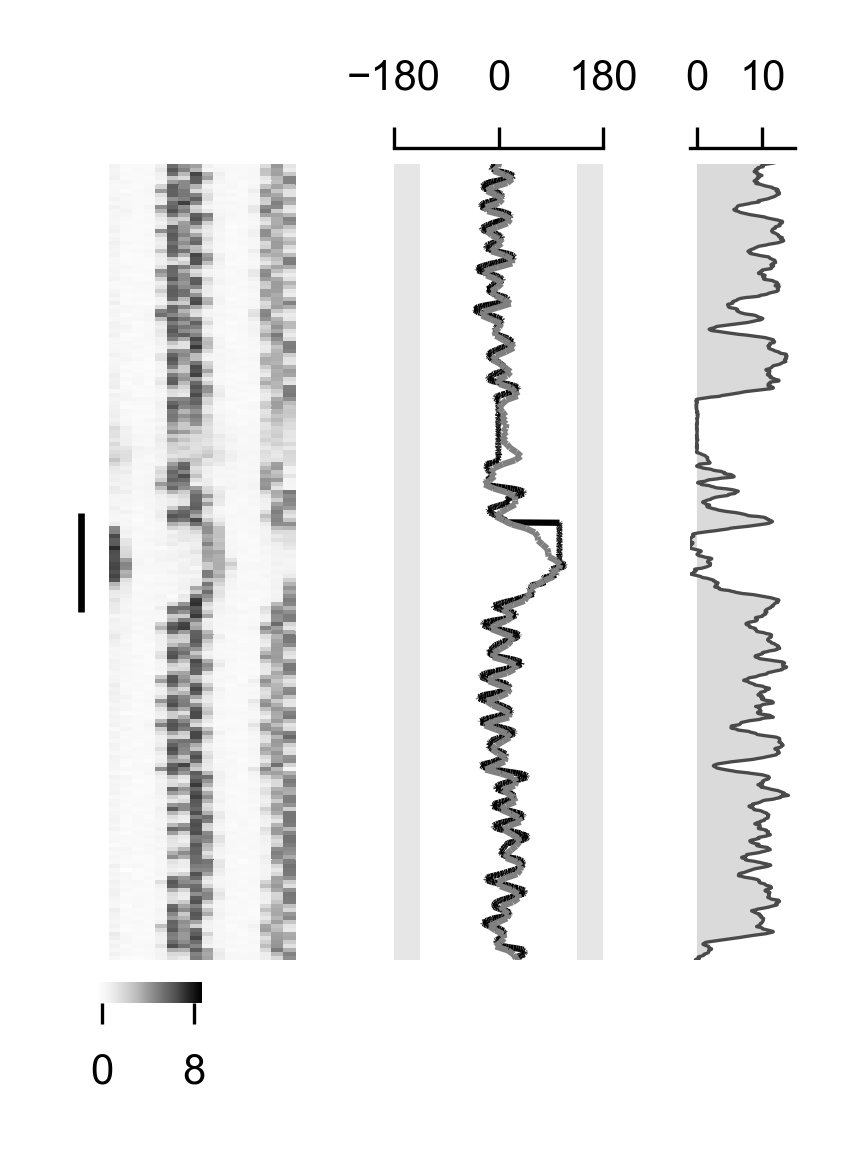

In [59]:
reload(epg_fc2_im)
epg_fc2_im.plot_example_epg_with_forw(genotypes['60D05'],rec_name='2022_08_30_0010',tlim=[272.0737+12,334.080597-10],
                                      dforw_lim=[-1,15],
                            save=save_figure,savepath=FIGURE_PATH,fname='Fig_1k.pdf')

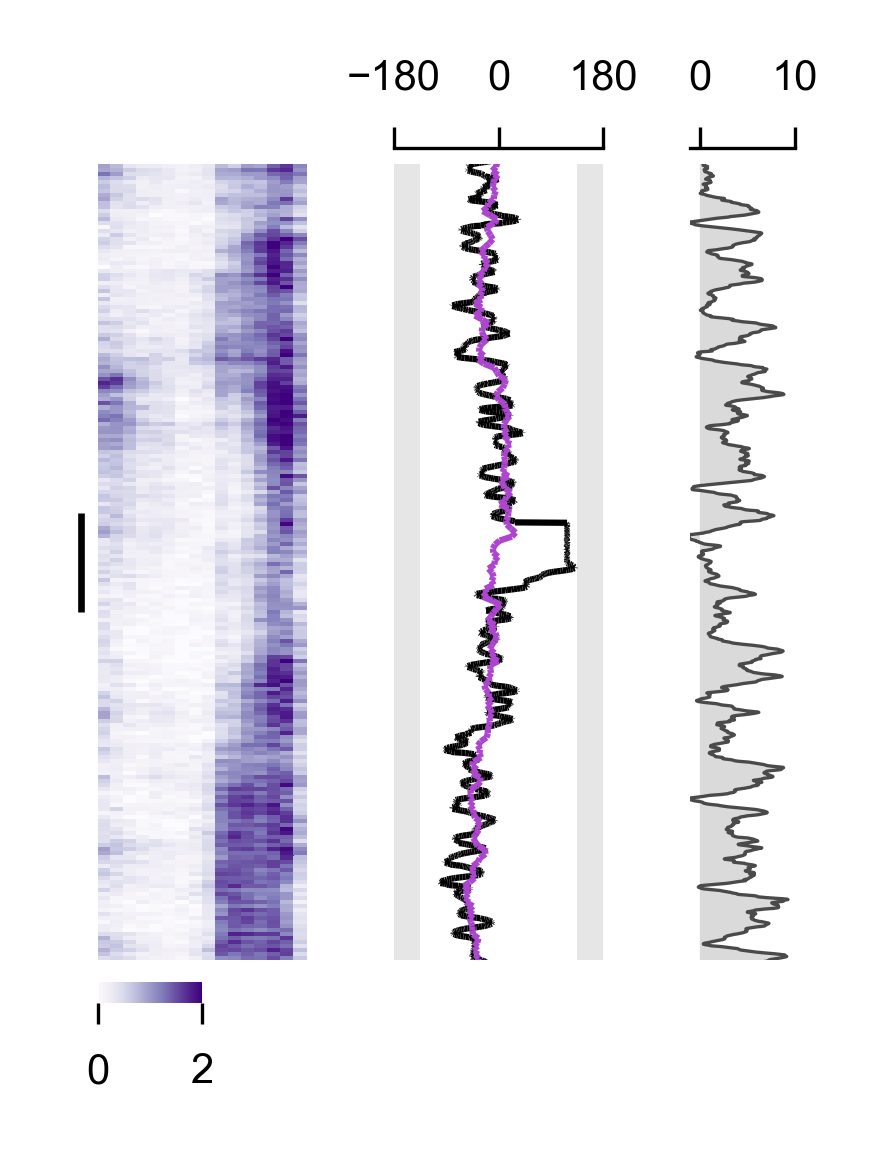

In [60]:
reload(epg_fc2_im)
reload(ap)
epg_fc2_im.plot_example_fc2_with_forw(genotypes['VT065306-AD-VT029306-DBD'],vlim=[0,2],
                            rec_name='2022_08_29_0005',tlim=[760.856445+12,822.862732-10],
                                      dforw_lim=[-1,10],
                            save=save_figure,savepath=FIGURE_PATH,fname='Fig_1l.pdf')

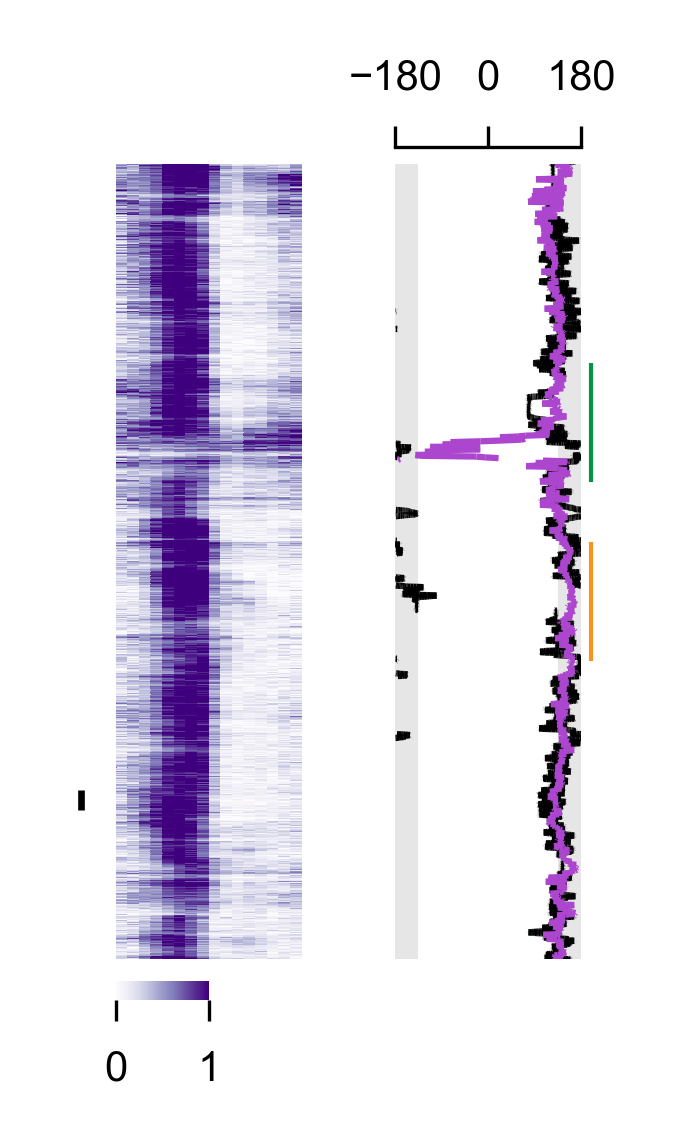

In [61]:
reload(epg_fc2_im)
epg_fc2_im.plot_example_fc2_drift(genotypes['VT065306-AD-VT029306-DBD'],rec_name='2022_08_29_0006',tlim=[800,1000],vlim=[0,1],
                                  save=save_figure,savepath=FIGURE_PATH,fname='ED_Fig_3h_left.pdf')

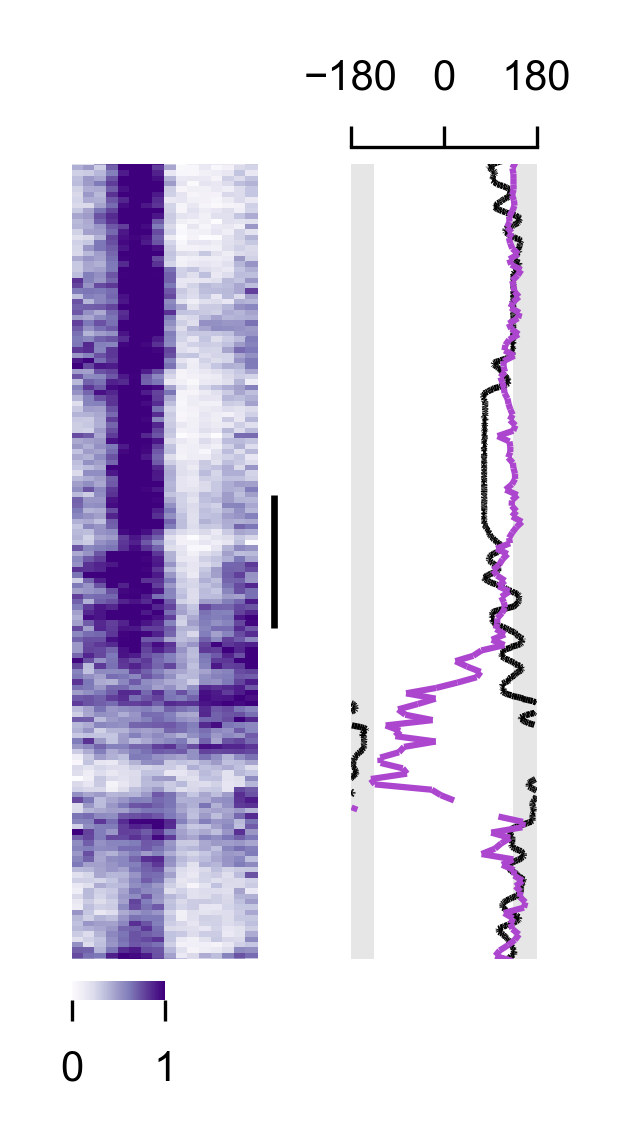

In [62]:
reload(epg_fc2_im)
epg_fc2_im.plot_example_fc_drift_zoom(genotypes['VT065306-AD-VT029306-DBD'],rec_name='2022_08_29_0006',tlim=[850,880],vlim=[0,1],
                                  save=save_figure,savepath=FIGURE_PATH,fname='ED_Fig_3h_middle.pdf')

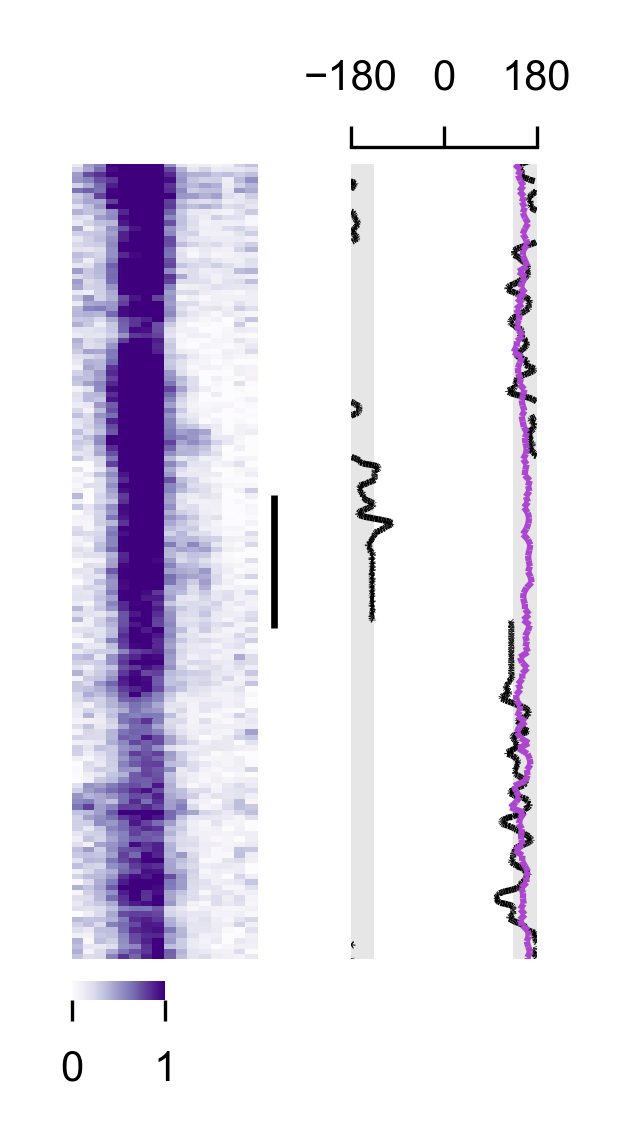

In [63]:
reload(epg_fc2_im)
epg_fc2_im.plot_example_fc_drift_zoom(genotypes['VT065306-AD-VT029306-DBD'],rec_name='2022_08_29_0006',tlim=[895,925],vlim=[0,1],
                                  save=save_figure,savepath=FIGURE_PATH,fname='ED_Fig_3h_right.pdf')

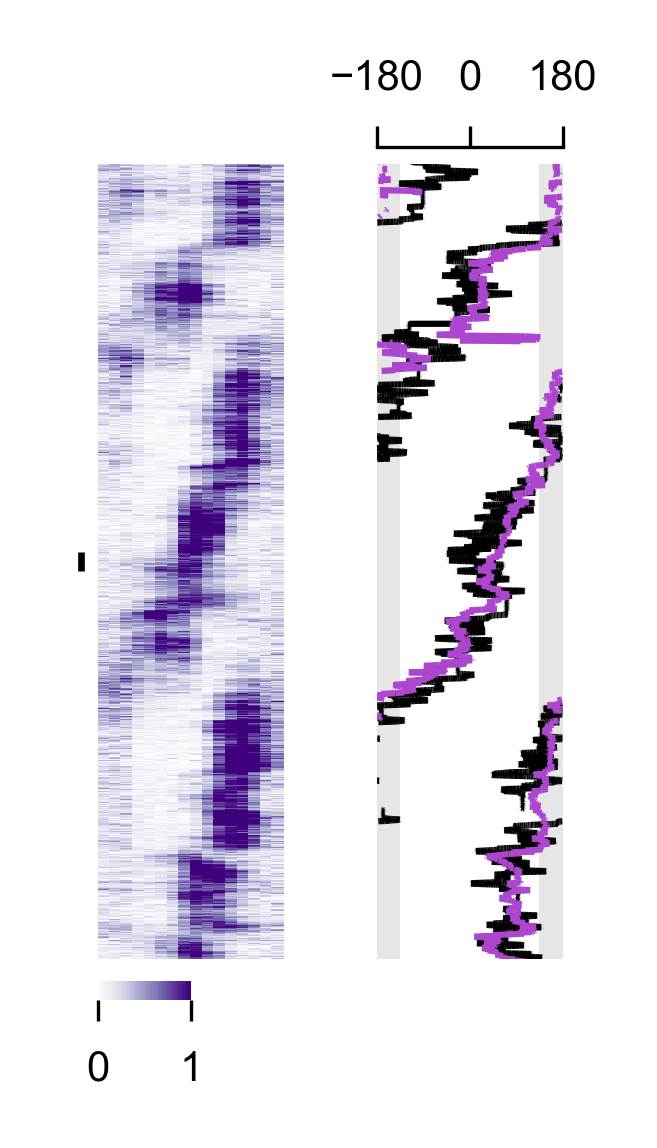

In [64]:
reload(epg_fc2_im)
epg_fc2_im.plot_example_fc2(genotypes['VT065306-AD-VT029306-DBD'],vlim=[0,1],
                            rec_name='2022_08_30_0008',tlim=[750,950], 
                                  save=save_figure,savepath=FIGURE_PATH,fname='ED_Fig_3i.pdf')

### Rapid FC2 phase transients ED Fig. 3g-h

In [65]:
reload(epg_fc2_im)
reload(ap)
abf_peaks_df,im_peaks_df=epg_fc2_im.get_phase_transients(recs=genotypes['VT065306-AD-VT029306-DBD'])

In [66]:
reload(epg_fc2_im)
peaks_melted_flipped,mean_peaks_flipped,peaks_melted_abf_flipped,mean_peaks_abf_flipped=epg_fc2_im.get_selected_phase_transients(abf_peaks_df,im_peaks_df)

In [67]:
print(len(peaks_melted_flipped['unique_trial_id'].unique()), 'transients')

print(len(peaks_melted_flipped['fly_id'].unique()), 'flies' )

141 transients
15 flies


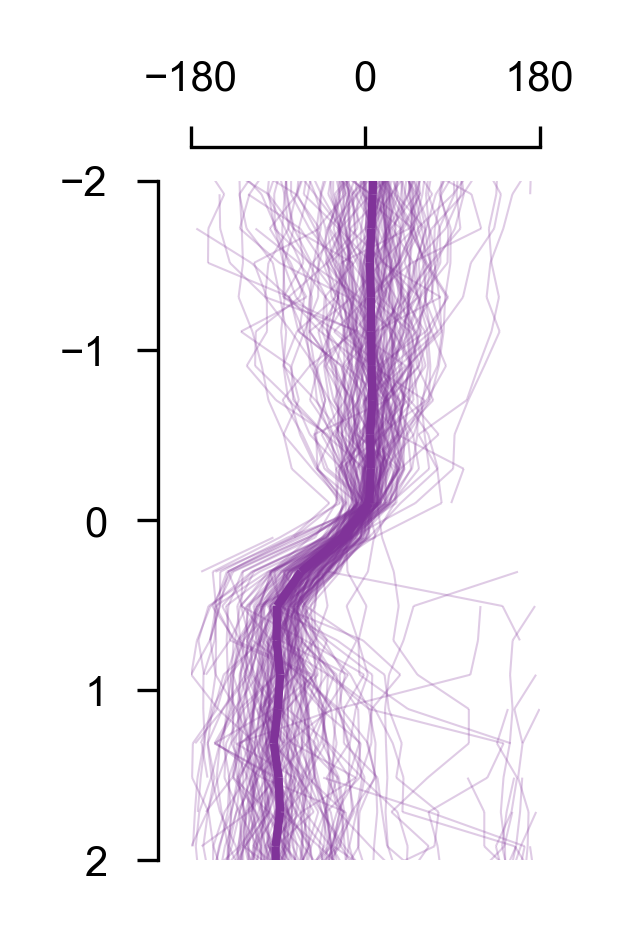

In [68]:
reload(epg_fc2_im)
epg_fc2_im.plot_phase_transients(peaks_melted_flipped,mean_peaks_flipped,
                                 save=save_figure,
                                 savepath=FIGURE_PATH,fname='ED_Fig_3g_left.pdf')

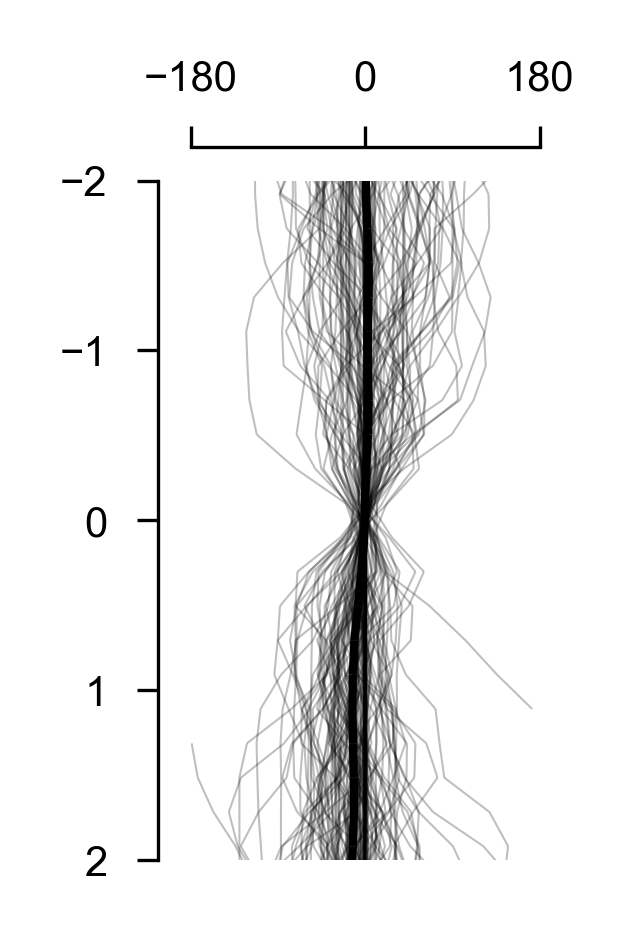

In [69]:
reload(epg_fc2_im)
epg_fc2_im.plot_phase_transients(peaks_melted_abf_flipped,mean_peaks_abf_flipped, 
                                 save=save_figure,
                                 savepath=FIGURE_PATH,fname='ED_Fig_3g_right.pdf')

2022_08_30_0008 [954.681640625, 966.681640625]


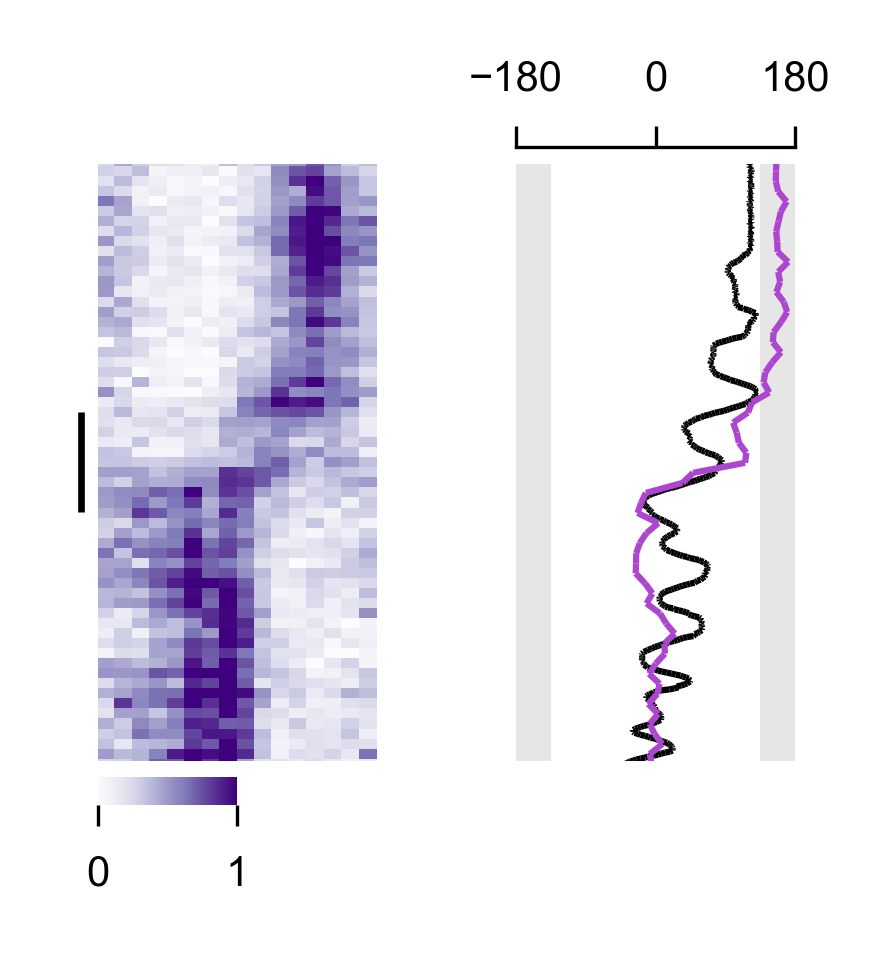

In [70]:
reload(epg_fc2_im)
epg_fc2_im.plot_example_phase_transient(recs=genotypes['VT065306-AD-VT029306-DBD'],
                                        im_peaks_df=im_peaks_df,unique_trial_id='2022_08_30_0008_965',
                                        save=save_figure,
                                 savepath=FIGURE_PATH,fname='ED_Fig_3f.pdf')

### Predicting PFL3 output using FC2 data and a synthetic heading signal (ED Fig. 9g,h and j)

In [47]:
reload(epg_fc2_im)
VT065306_AD_VT029306_DBD_synthetic=epg_fc2_im.get_synthetic_data(genotypes['VT065306-AD-VT029306-DBD'])

In [51]:
reload(epg_fc2_im)

synthetic_binned_df,\
synthetic_mean_df=epg_fc2_im.get_predicted_rml_distance_to_goal(VT065306_AD_VT029306_DBD_synthetic.merged_im_df,
                                                               save=save_source_data,
                                                               savepath=SOURCE_DATA_PATH,
                                                               fname='ED_Fig_9j.csv')

10 flies


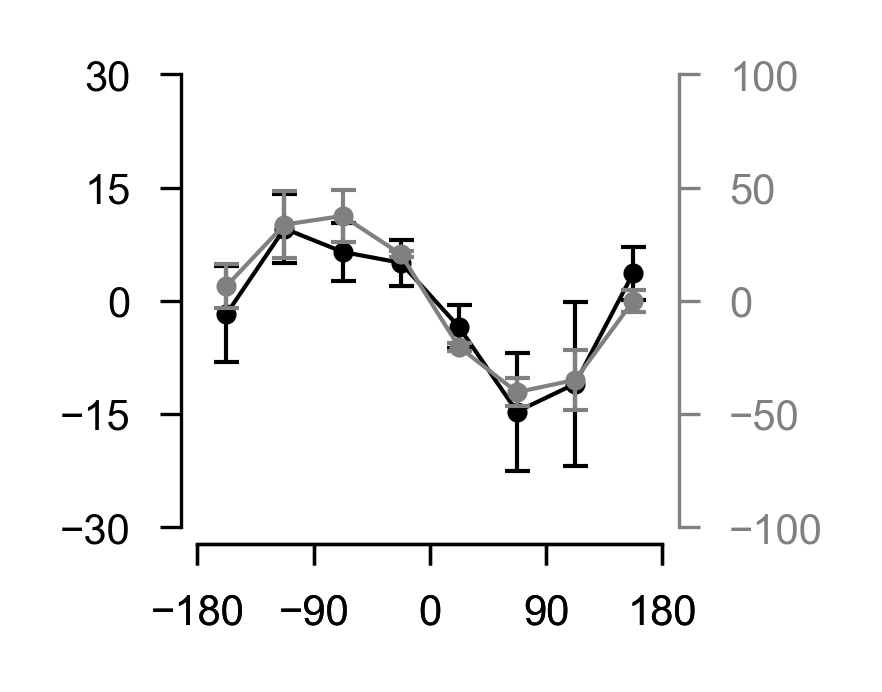

In [50]:
reload(epg_fc2_im)
epg_fc2_im.plot_predicted_rml_vs_distance_to_goal(synthetic_mean_df,
                                                  save=save_figure,
                                                  savepath=FIGURE_PATH,
                                                  fname='ED_Fig_9j.pdf')

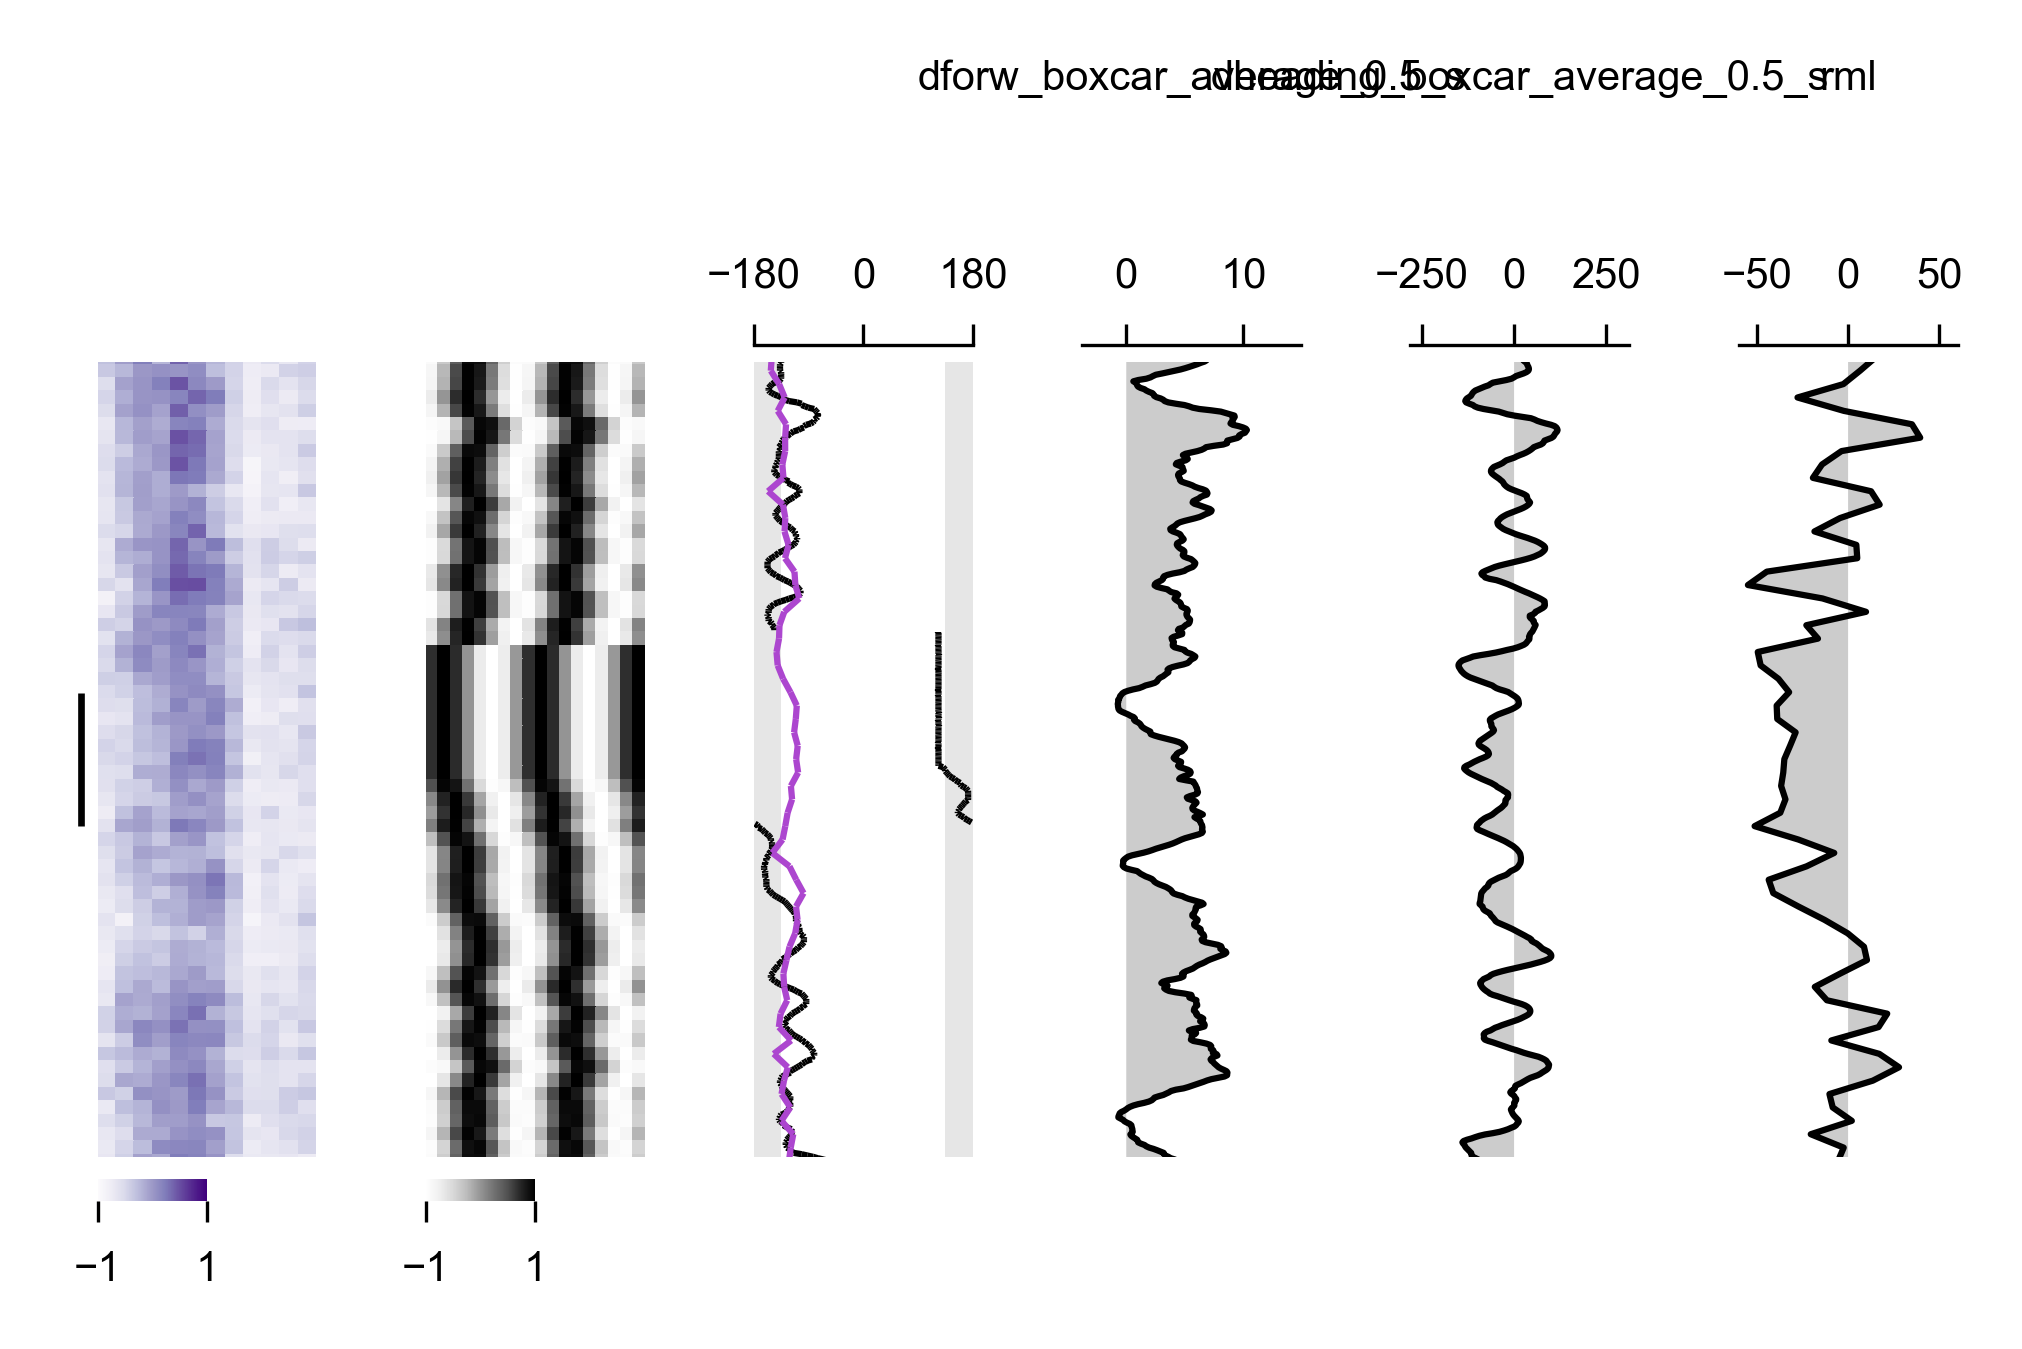

In [74]:
reload(epg_fc2_im)
epg_fc2_im.plot_synthetic_example_trace(VT065306_AD_VT029306_DBD_synthetic,
                                        save=save_figure,
                                        savepath=FIGURE_PATH,
                                       fname='ED_Fig_9g.pdf')

Gets trials, but with synthetic heading signal

In [75]:
reload(epg_fc2_im)
synthetic_abf_trials_df,\
synthetic_im_trials_df =epg_fc2_im.get_synthetic_trials(VT065306_AD_VT029306_DBD_synthetic)

In [76]:
reload(epg_fc2_im)
predicted_rml_dheading_df=epg_fc2_im.get_predicted_rml_dheading_df(synthetic_abf_trials_df,synthetic_im_trials_df,
                                  save=save_source_data,savepath=SOURCE_DATA_PATH,fname='ED_Fig_9h.csv')

0.3301927395648197
0.47780571049267995


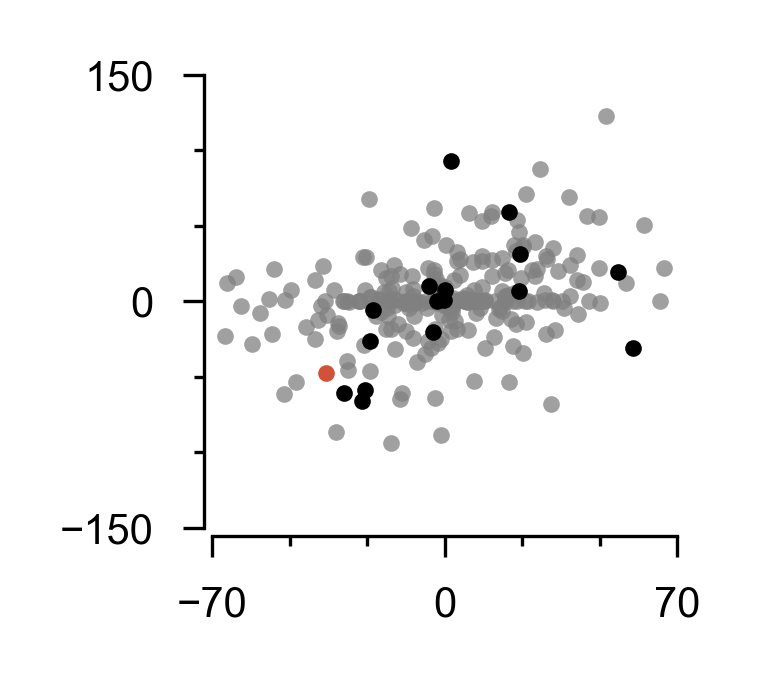

In [77]:
reload(epg_fc2_im)
epg_fc2_im.plot_predicted_rml_vs_dheading(predicted_rml_dheading_df,
                                          save=save_figure,savepath=FIGURE_PATH,fname='ED_Fig_9h.pdf')

### Behaviour characterization (ED Fig. 2i)
We re-process trials, this is for the purpose of showing behaviour

In [78]:
behaviour_only_dfs=[]
for genotype,recs in genotypes.items():
    abf_trials_df_behaviour_only=bh.get_trials(recs,pad_s=60,stimid_map= 
              {'+90 jump':[9,11],
              '-90 jump':[5,8],
              'CL_bar':[-1,4]
              },bar_jump_duration_s=2,im=False)
    behaviour_only_dfs.append(abf_trials_df_behaviour_only)

In [79]:
abf_trials_df_beahviour_only = pd.concat(behaviour_only_dfs)

In [80]:
reload(bh)
selected_trials_df=bh.get_selected_trials(abf_trials_df_beahviour_only,criteria='std_before<45')

fraction of valid trials: 0.5906976744186047


In [81]:
reload(bh)
mean_trial_fly_df,trial_fly_df=bh.get_mean_goal_diff(selected_trials_df,
                                                    save=save_source_data,
                                                    savepath=SOURCE_DATA_PATH,
                                                    fname='ED_Fig_2i_epg_fc2.csv')

Total flies:
 trial_type
-90 jump    24
+90 jump    24
dtype: int64


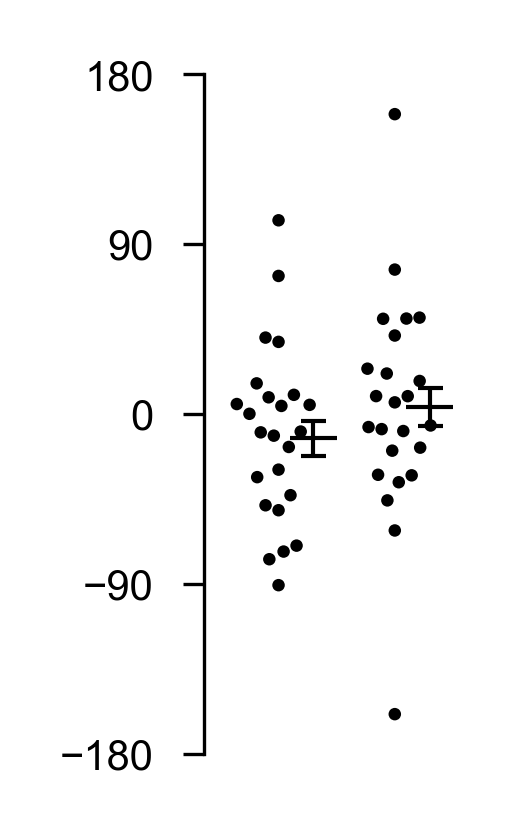

In [82]:
reload(bh)
bh.plot_goal_diff(mean_trial_fly_df,trial_fly_df,
                  save=save_figure,savepath=FIGURE_PATH,fname='ED_Fig_2i_epg_fc2.pdf')

# Save processed data

In [104]:
PROCESSED_DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/shared_data/EPG_FC2_imaging/'

In [105]:
reload(epg_fc2_im)
epg_fc2_im.save_processed_data(PROCESSED_DATA_PATH,genotypes)